### Project Introduction

**DOMAIN**: Industrial safety. NLP based Chatbot

**CONTEXT**: The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment


**DATA DESCRIPTION**:
Columns description:


*   Data: timestamp or time/date information
*   Countries: which country the accident occurred (anonymised)
*   Local: the city where the manufacturing plant is located (anonymised)
*   Industry sector: which sector the plant belongs to
*   Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
*   Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
*   Genre: if the person is male of female
*   Employee or Third Party: if the injured person is an employee or a third party
*   Critical Risk: some description of the risk involved in the accident
*   Description: Detailed description of how the accident happened


**PROJECT OBJECTIVE**: Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description

### Importing Libraries

In [ ]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Optional, Any

# Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

#Machine Learning Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
import random
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


#Handle Warnings
import warnings
warnings.filterwarnings("ignore")

#Deep Learning Library
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Embedding, Dropout, Flatten,Activation, Bidirectional, GRU, SimpleRNN, Input, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from transformers import AutoTokenizer, AutoModelForCausalLM, BertTokenizer, TFBertModel
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import register_keras_serializable

# #Google Drive
# from google.colab import drive
# drive.mount('/content/drive')


nltk.download('stopwords')
nltk.download('wordnet')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Milestone 1

### 1. Importing Data

In [ ]:
#Mounting Gdrive and loading the dataset to variable data

#drive.mount('/content/drive')
#project_path = '/content/drive/MyDrive/courses/aiml/capstone/'
#dataset = project_path + 'Data_Set_industrial_safty_and_health_database_with_accidents_description.xlsx'

## Kaggle
dataset_path = "/kaggle/input/main-data/Data_Set_ISH.xlsx"
df = pd.read_excel(dataset_path)

# df = pd.read_excel('/content/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx')
print(f"We've {df.shape[0]} rows and {df.shape[1]} columns.")

We've 425 rows and 11 columns.


In [ ]:
df.head(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."
5,5,2016-01-12,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes."
6,6,2016-01-16,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),"The collaborator reports that he was on street 09 holding in his left hand the volumetric balloon, when he slipped and when placing his hand on the ground the volumetric balloon ended up breaking caused a small wound in his left hand."
7,7,2016-01-17,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic technician José of the Tecnomin verified the transmission belts of the HM-100 pump at the Acid plant, he proceeded to turn the pulley manually; unexpectedly at that instant the electrician supervisor Miguel of the EKA Mining grabs the transmission belts to verify their tension, at which point the finger traps."
8,8,2016-01-19,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,"Employee was sitting in the resting area at level 326 (raise bore), when 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


### 2. Data Cleansing

#### Renaming Fields

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.rename(columns = {'Data' : 'Date','Countries' : 'Country', 'Genre' : 'Gender', 'Employee or Third Party': 'Employee Type'}, inplace = True)

In [ ]:
df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


#### Checking Unique Values

In [ ]:
for i in list(df.columns[0:9]):
  print('-' * 50)
  print(f'Unique values of {i}')
  print('-' * 50)
  print(df[i].unique())
  print("\n")

--------------------------------------------------
Unique values of Date
--------------------------------------------------
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]


--------------------------------------------------
Unique values of Country
--------------------------------------------------
['Country_01' 'Country_02' 'Country_03']


--------------------------------------------------
Unique values of Local
--------------------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05'

In [ ]:
### Replacing "\nNot Applicable" to "Not Applicable" in Critical Risk
df['Critical Risk'] = df['Critical Risk'].replace('\nNot applicable', 'Not Applicable')

In [ ]:
df['Accident Level'].value_counts()

Accident Level
I      316
II      40
III     31
IV      30
V        8
Name: count, dtype: int64

#### Missing Value Check

In [ ]:
df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

#### Duplicate Data Check

In [ ]:
print(f"Duplicated Rows: {df.duplicated().sum()}")

Duplicated Rows: 7


In [ ]:
# Reviewing duplicate Rows
df[df.duplicated()]

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout."
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs."
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"Team of the VMS Project performed soil collection on the Xixás target with 3 members. When the teams were moving from one collection point to another, Mr. Fabio was ahead of the team, stinging behind Robson and Manoel da Silva. near the collection point were surprised by a swarm of bees that was inside a I play near the ground, with no visibility in the woods and no hissing noise. Fabio passed by the stump, but Robson and Manoel da Silva were attacked by the bees. Robson had a sting in his left arm over his uniform and Manoel da Silva had a prick in his lip as his screen ripped as he tangled in the branches during the escape."
397,2017-05-23,Country_01,Local_0

In [ ]:
#Dropping Duplicate Rows
df.drop_duplicates(keep = 'first', inplace = True)
df.reset_index(drop = True, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee Type             418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 32.8+ KB


In [ ]:
# Checking and removing duplicates only considering Industry Sector and Description columns
df.drop_duplicates(subset=['Industry Sector','Description'],keep = 'first', inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      411 non-null    datetime64[ns]
 1   Country                   411 non-null    object        
 2   Local                     411 non-null    object        
 3   Industry Sector           411 non-null    object        
 4   Accident Level            411 non-null    object        
 5   Potential Accident Level  411 non-null    object        
 6   Gender                    411 non-null    object        
 7   Employee Type             411 non-null    object        
 8   Critical Risk             411 non-null    object        
 9   Description               411 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 32.2+ KB


#### Data Cleansing Summary



*   The original dataset contains 425 rows and 11 columns
*   We have renamed the columns
*   We dropped the increment id column in the dataset as it is not required
*   There are no missing values in the dataset.
*   We identified 7 rows duplicated and we have removed them.
*   We also identified another 7 rows duplicated if we only consider the columns Industry Sector and Description. We noticed that same incident was reported by different Employee Type. As part of duplication logic handling, we decided to remove these records from the dataset as well.
*   In the final dataset, we have 411 rows.




### 3. EDA

#### Univariate Analysis

In [ ]:
# Function for plotting Column value Counts
def SingleColumnPlots(column_name, pieplot=True, Axis_x=15, Axis_y=6, Rotation_x_lables=False):
    print(f" >> \033[1m {column_name} \033[0m << ");

    if(pieplot == True):
        plt.figure(figsize = (12,10))
        plt.subplot(2,2,1)
    else:
        plt.figure(figsize = (Axis_x,Axis_y))


    sns.countplot(df, x=column_name, order=df[column_name].value_counts().index);

    if(Rotation_x_lables == True):
        plt.xticks(rotation=90);

    if(pieplot == True):
        plt.subplot(2,2,2)
        plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, autopct = "%.2f")

 >>  Industry Sector  << 


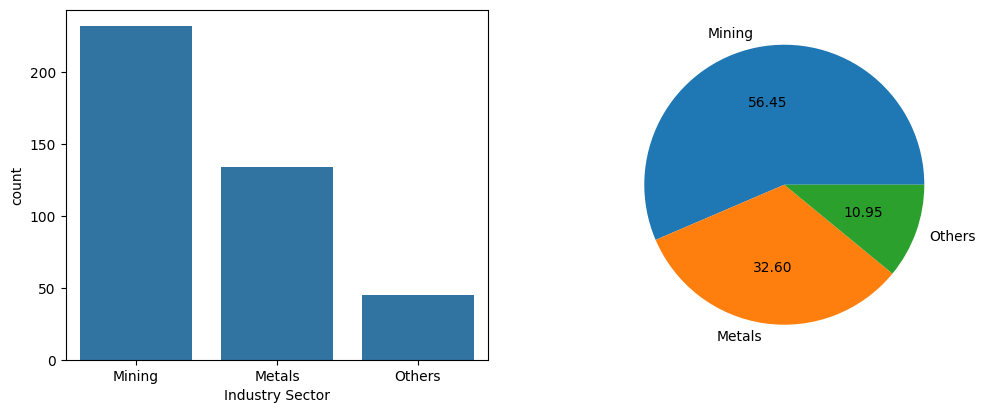

In [ ]:
SingleColumnPlots("Industry Sector")

 >>  Country  << 


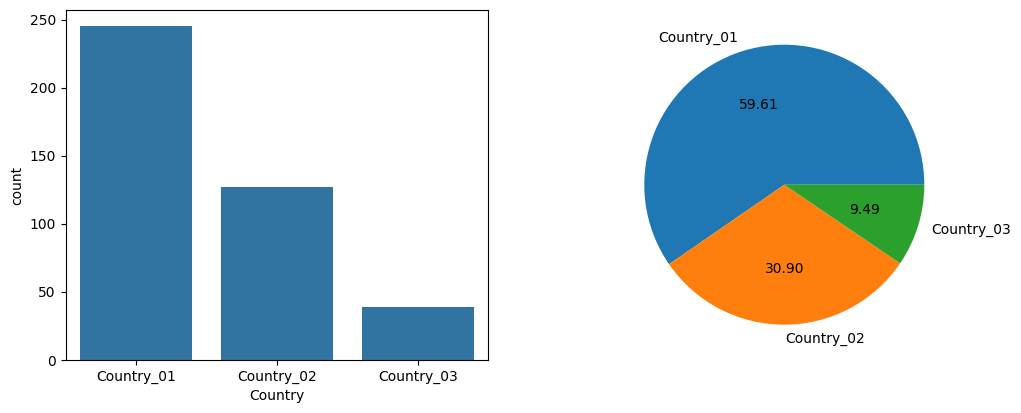

In [ ]:
SingleColumnPlots("Country")

 >>  Local  << 


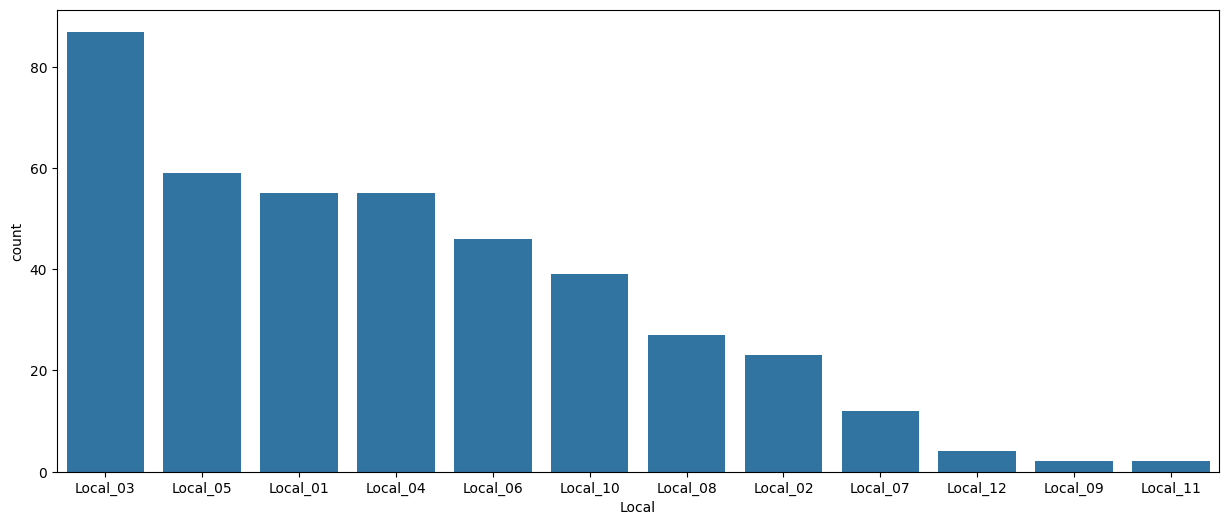

In [ ]:
SingleColumnPlots("Local", False)

 >>  Accident Level  << 


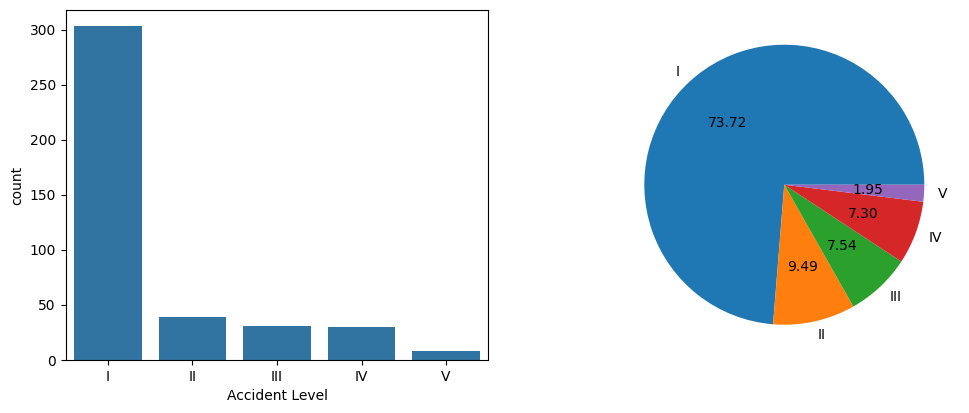

In [ ]:
SingleColumnPlots("Accident Level")

 >>  Potential Accident Level  << 


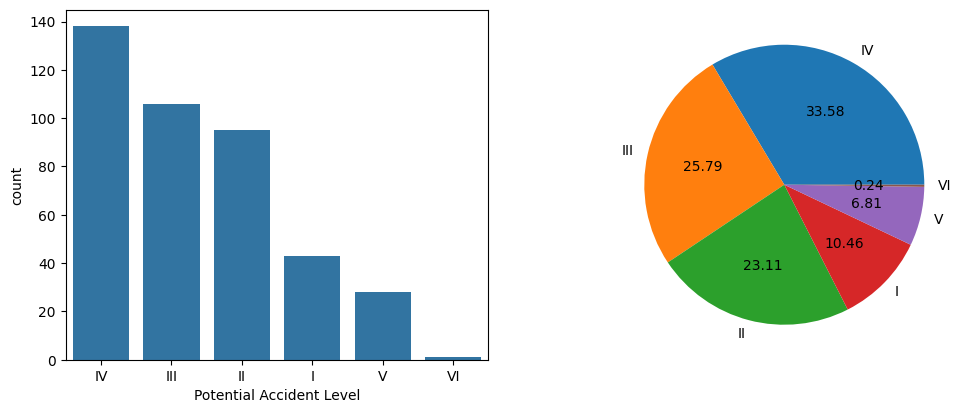

In [ ]:
SingleColumnPlots("Potential Accident Level")

 >>  Gender  << 


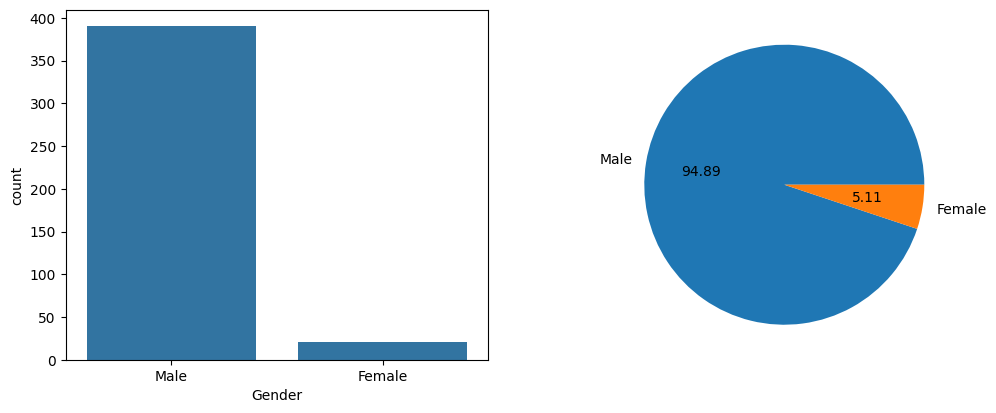

In [ ]:
SingleColumnPlots("Gender")

 >>  Employee Type  << 


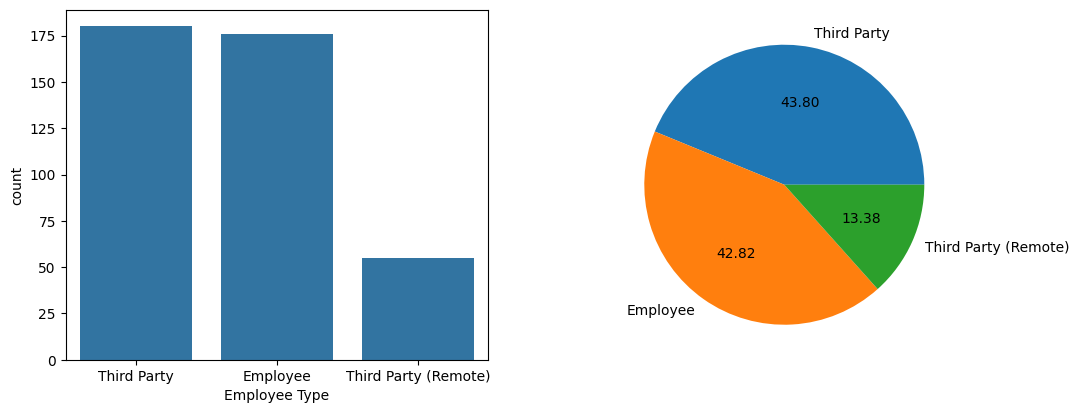

In [ ]:
SingleColumnPlots("Employee Type")

 >>  Critical Risk  << 


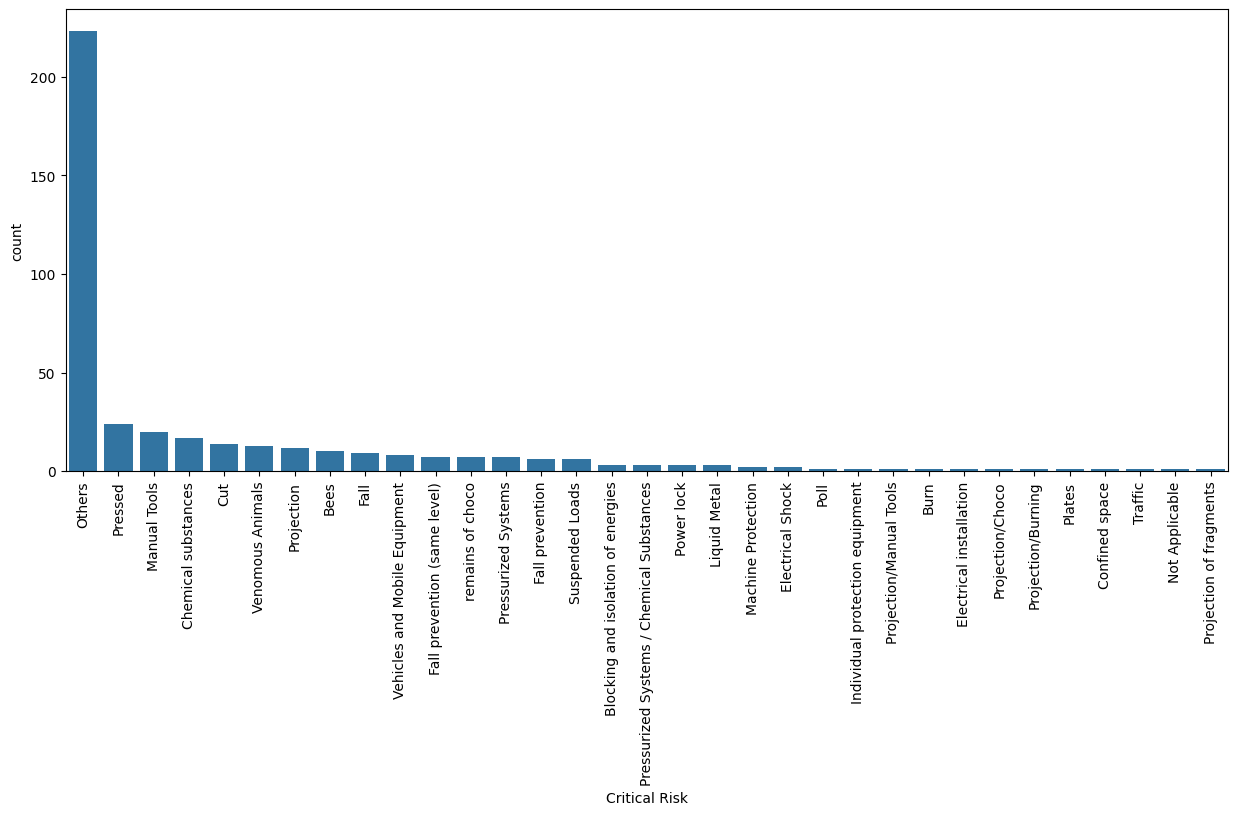

In [ ]:
SingleColumnPlots("Critical Risk", False, Rotation_x_lables=True)

#### Bivariate Analysis

In [ ]:
# Function for Bivariate Plotting
def BiVariateCountPlots(column_name, hue_col, axis_x=15, axis_y=6, Rotation_x_labels=False):
    print(f" >> \033[1m {column_name} & {hue_col} \033[0m << ");

    plt.figure(figsize = (axis_x,axis_y))
    sns.countplot(df, x=column_name, hue=hue_col, order=df[column_name].value_counts().index);

    if(Rotation_x_labels == True):
        plt.xticks(rotation=90);

 >>  Country & Accident Level  << 


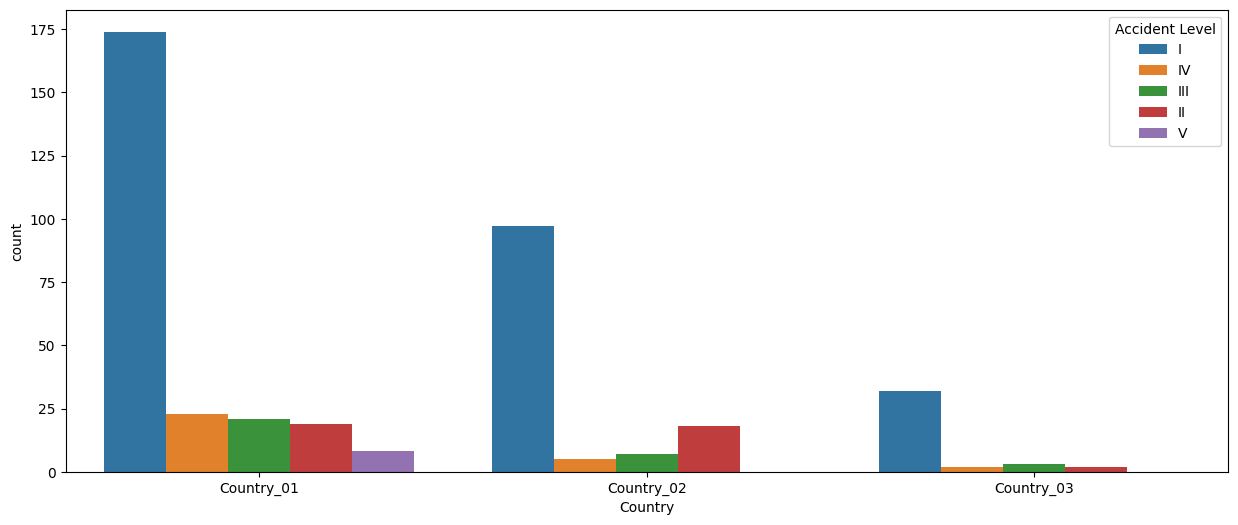

In [ ]:
BiVariateCountPlots("Country", "Accident Level")

 >>  Local & Accident Level  << 


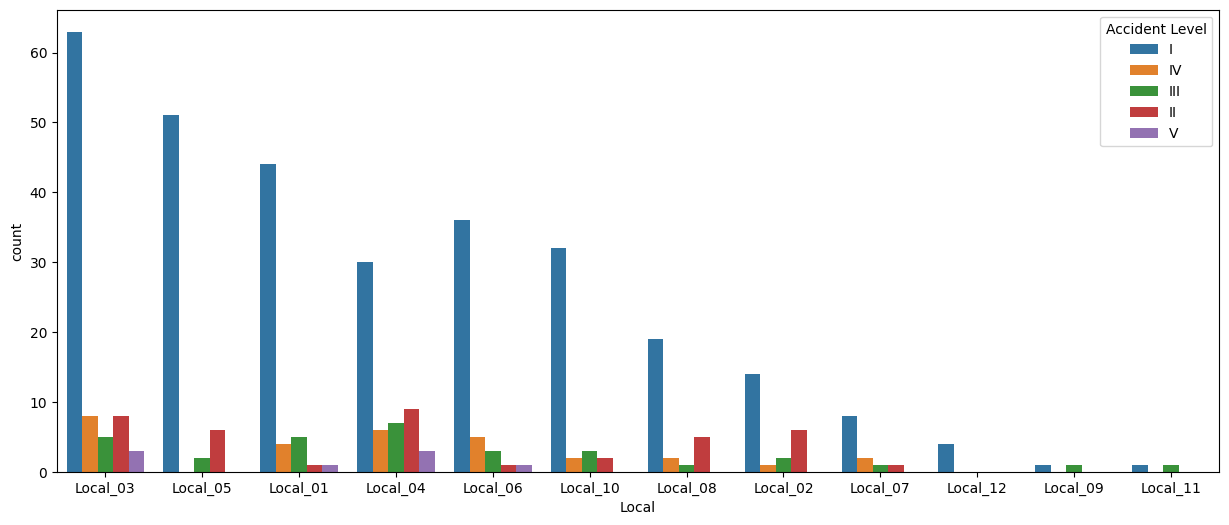

In [ ]:
BiVariateCountPlots("Local", "Accident Level")

 >>  Industry Sector & Accident Level  << 


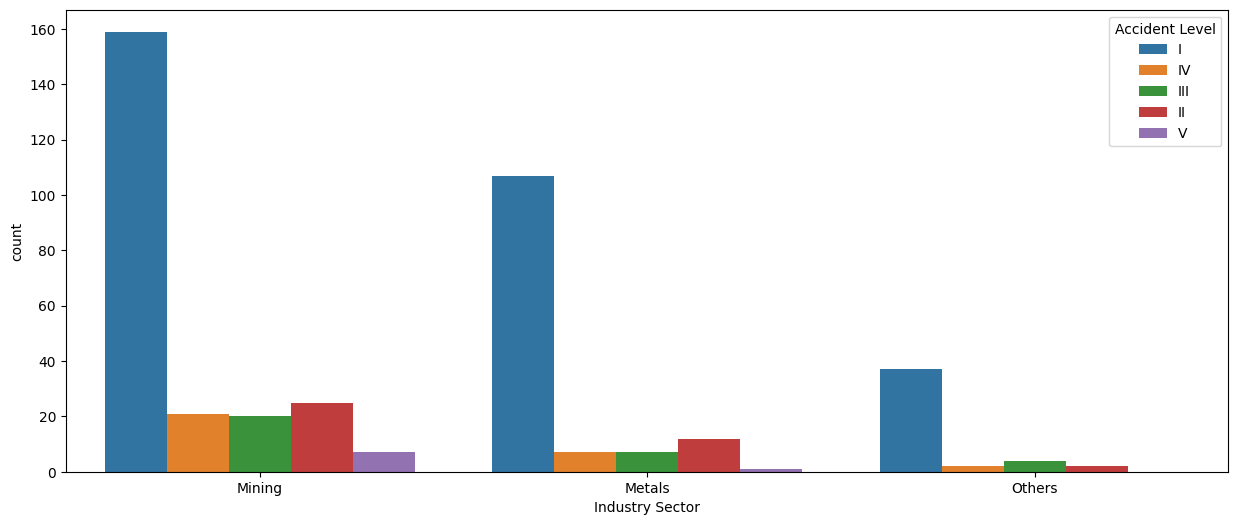

In [ ]:
BiVariateCountPlots("Industry Sector", "Accident Level")

 >>  Gender & Accident Level  << 


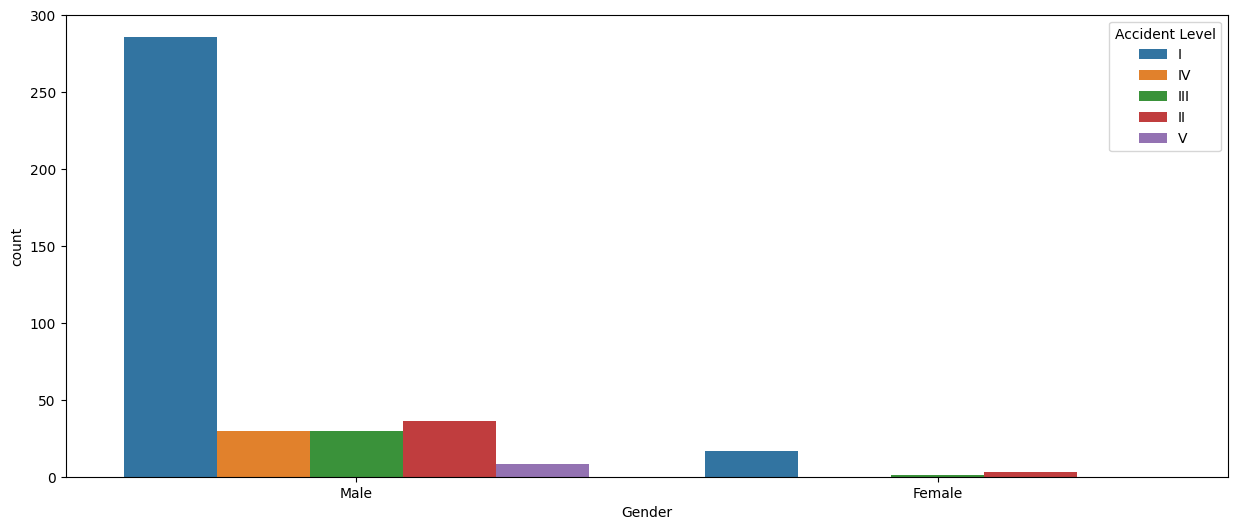

In [ ]:
BiVariateCountPlots("Gender", "Accident Level")

 >>  Employee Type & Accident Level  << 


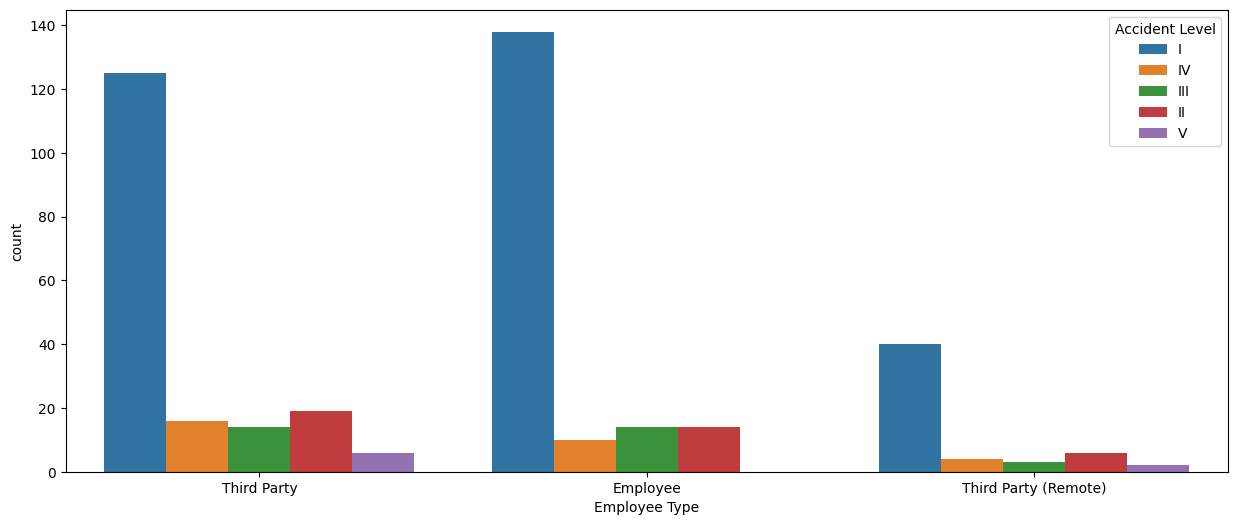

In [ ]:
BiVariateCountPlots("Employee Type", "Accident Level")

 >>  Critical Risk & Accident Level  << 


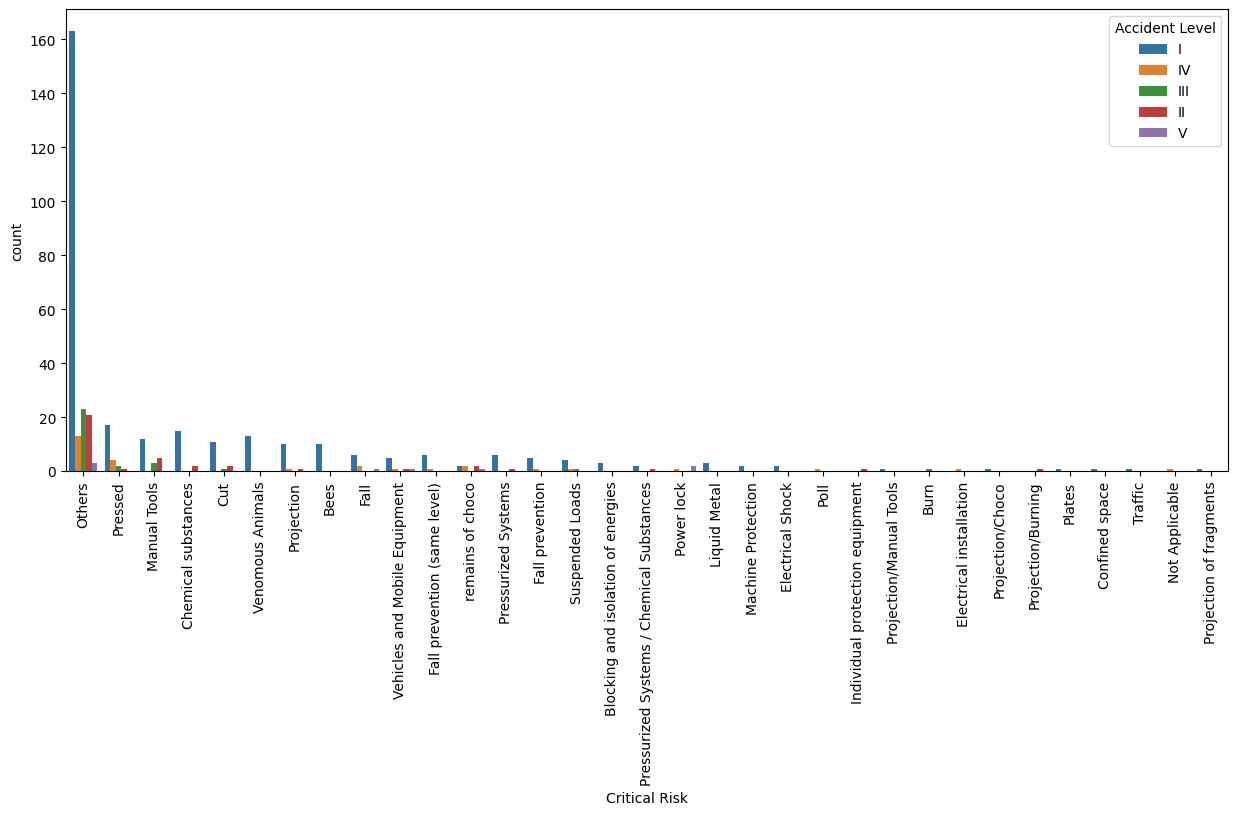

In [ ]:
BiVariateCountPlots("Critical Risk", "Accident Level", Rotation_x_labels=True)

In [ ]:
le = LabelEncoder()
column_list=['Country','Industry Sector','Accident Level','Gender','Critical Risk']
df_encoded = df[column_list].apply(le.fit_transform)

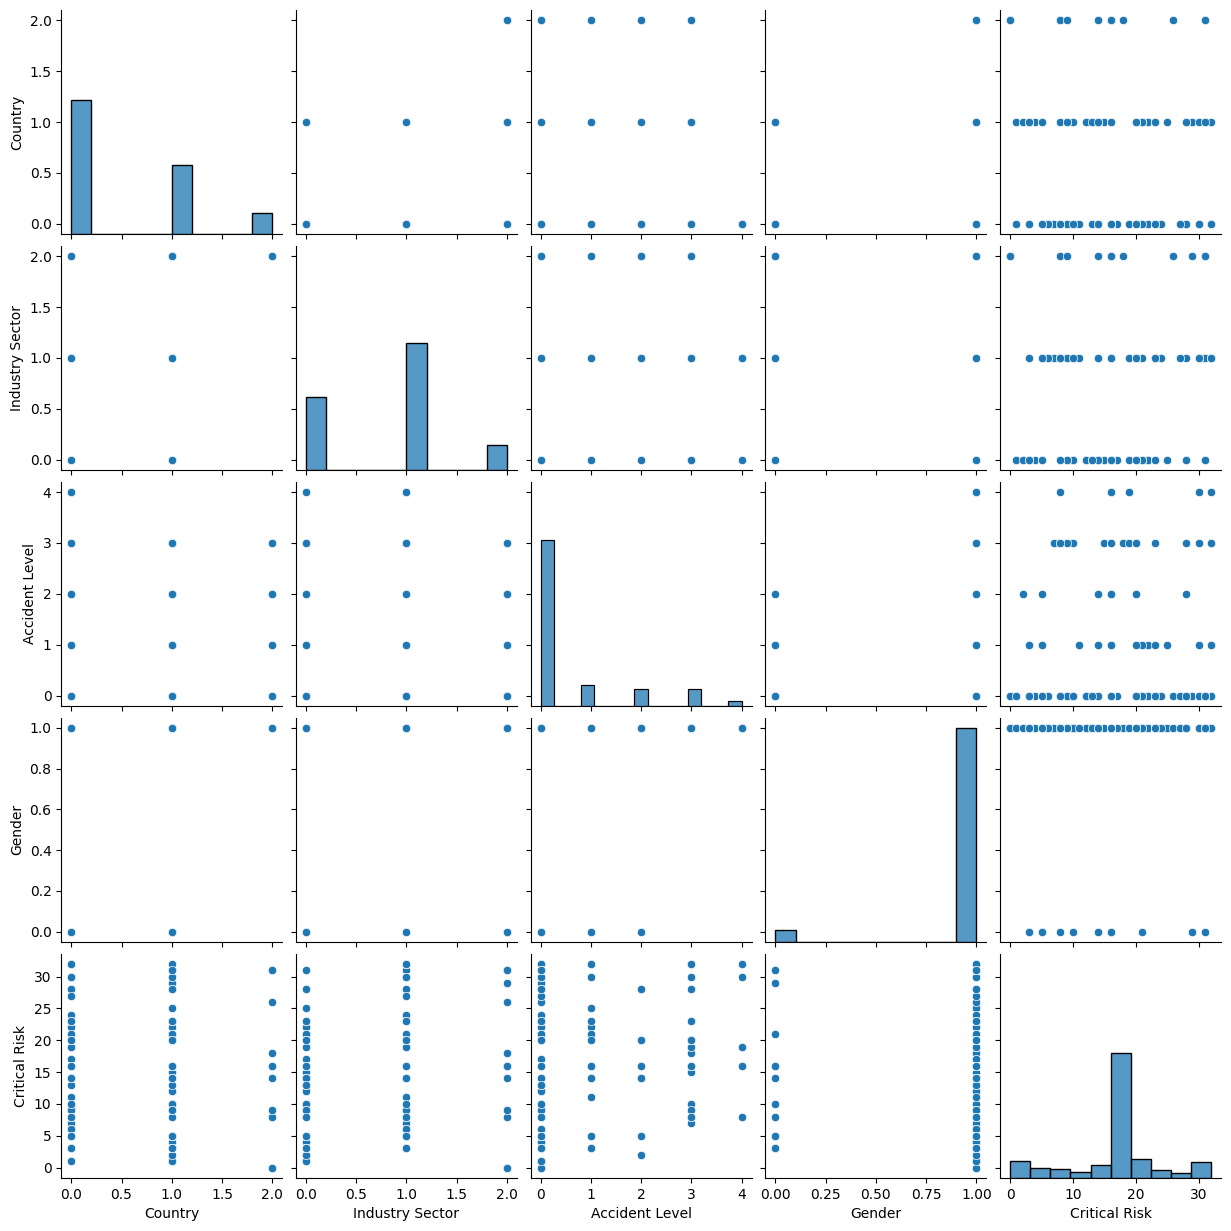

In [ ]:
sns.pairplot(df_encoded);

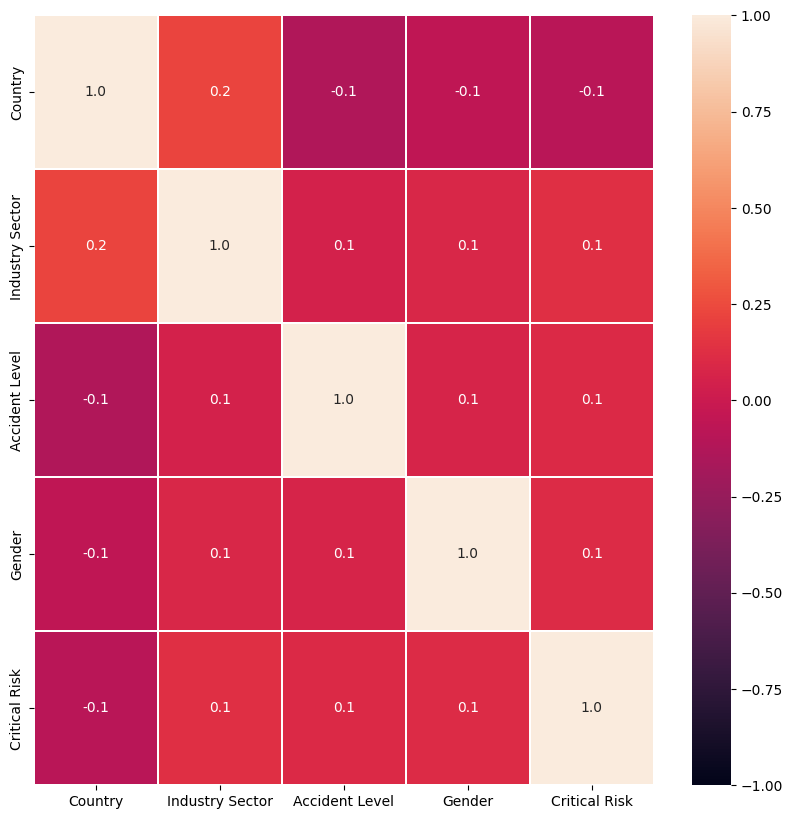

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True, linewidth=0.3, fmt=".1f");

#### EDA Summary



*   The Mining sector has the highest count of incidents.
*   Data Consists of 59.61% incidents recorded from Country_01 which is the highest count followed by Country_02 (30.90%) & Country_03 (9.49%).
*   73.72% of incidents recorded as “Accident Level I”, Levels II, III, and IV have similar but significantly smaller counts compared to Level I, Level V has the lowest counts, It suggest that data is highly imbalanced, with Accident Level I constituting the vast majority of the records.
*   the majority of individuals injured are male.



### 4. NLP Preprocessing

In [ ]:
# Reviewing Descrition Column
df['Description'][0 : 5]

0                                                                                                             While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
1                                                                                                                                                                                                                                                                   During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of t

#### Remove Special Characters

In [ ]:
def remove_special_characters(text):
  pattern = '[^A-Za-z0-9]+'
  new_text = ''.join(re.sub(pattern, ' ', text))
  return new_text

df['desc_special_char'] = df['Description'].apply(remove_special_characters)
df.loc[0 : 3, ['Description', 'desc_special_char']]

,Description,desc_special_char
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",In the sub station MILPO located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",Being 9 45 am approximately in the Nv 1880 CX 695 OB7 the personnel begins the task of unlocking the Soquet bolts of the BHB machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding Mr Crist bal Auxiliary assistant to climb to the platform to exert pressure with your hand on the DADO key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


#### Converting to Lower Case

In [ ]:
# changing the case of the text data to lower case
df['desc_lower_case'] = df['desc_special_char'].str.lower()
# checking a couple of instances of cleaned data
df.loc[0:3, ['Description','desc_lower_case']]

,Description,desc_lower_case
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


#### Strip Words

In [ ]:
df['desc_stripped'] = df['desc_lower_case'].str.strip()
df.loc[0 : 3, ['Description', 'desc_stripped']]

,Description,desc_stripped
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


#### Remove StopWords

In [ ]:
def remove_stopwords(text):
  words = text.split()
  new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
  return new_text

df['desc_after_stopwords'] = df['desc_stripped'].apply(remove_stopwords)
df.loc[0 : 3, ['Description', 'desc_after_stopwords']]

,Description,desc_after_stopwords
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",9 45 approximately nv 1880 cx 695 ob7 personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury


#### Word Stemming

In [ ]:
ps = PorterStemmer()

def apply_porter_stemmer(text):
  words = text.split()
  new_text = ' '.join([ps.stem(word) for word in words])
  return new_text

df['cleaned_text'] = df['desc_after_stopwords'].apply(apply_porter_stemmer)
df.loc[0 : 3, ['Description', 'cleaned_text']]

,Description,cleaned_text
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",sub station milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",9 45 approxim nv 1880 cx 695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr crist bal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anti clockwis direct leav key bolt hit palm left hand caus injuri


In [ ]:
df.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,desc_special_char,desc_lower_case,desc_stripped,desc_after_stopwords,cleaned_text
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid imme

#### NLP Preprocessing Summary

We have applied the following preprocessing techniques for building our NLP Models

*   Removed all special characters
*   All words are converted to lower case
*   The words are stripped to remove any whitespaces
*   We have removed the common stop words from the description
*   We have applied word stemming to bring all words to its root word.




### 5. Data Preparation - Cleaned Data

In [ ]:
df_final=df.copy()

#### Convert Accident Level to Numeric Values

In [ ]:
roman_to_int_map = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5
}

In [ ]:
df_final['label'] = df_final['Accident Level'].map(roman_to_int_map)


In [ ]:
df_final.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,desc_special_char,desc_lower_case,desc_stripped,desc_after_stopwords,cleaned_text,label
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach m

In [ ]:
categories_encoded = pd.get_dummies(df_final[['Industry Sector', 'Country']])
categories_encoded = categories_encoded.astype(int)

In [ ]:
categories_encoded.head()

,Industry Sector_Metals,Industry Sector_Mining,Industry Sector_Others,Country_Country_01,Country_Country_02,Country_Country_03
0,0,1,0,1,0,0
1,0,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0


In [ ]:
df_final = pd.concat([df_final, categories_encoded], axis=1)

In [ ]:
df_final.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,desc_special_char,desc_lower_case,desc_stripped,desc_after_stopwords,cleaned_text,label,Industry Sector_Metals,Industry Sector_Mining,Industry Sector_Others,Country_Country_01,Country_Country_02,Country_Country_03
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo,1,0,1,0,1,0,0
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the

In [ ]:
#Dropping All fields that will not be used in Models
columns_to_drop = ['Date','Country', 'Local','Industry Sector','Employee Type','Accident Level','Gender','Critical Risk', 'Potential Accident Level', 'Description', 'desc_special_char', 'desc_lower_case', 'desc_stripped', 'desc_after_stopwords']
df_final.drop(columns=columns_to_drop)

,cleaned_text,label,Industry Sector_Metals,Industry Sector_Mining,Industry Sector_Others,Country_Country_01,Country_Country_02,Country_Country_03
0,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo,1,0,1,0,1,0,0
1,activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter,1,0,1,0,0,1,0
2,sub station milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri,1,0,1,0,1,0,0
3,9 45 approxim nv 1880 cx 695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr crist bal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anti clockwis direct leav key bolt hit palm left hand caus injuri,1,0,1,0,1,0,0
4,approxim 11 45 circumst mechan anthoni group leader eduardo eric fern ndez injur three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 1 06 meter high hit instep right foot worker caus injuri describ,4,0,1,0,1,0,0
5,unload oper ustulado bag need unclog discharg mouth silo truck perform procedur maneuv unhook hose without total depressuris mouth project ustulado powder collabor caus irrit eye,1,1,0,0,0,1,0
6,collabor report street 09 hold left hand volumetr balloon slip place hand ground volumetr balloon end break caus small wound left hand,1,1,0,0,0,1,0
7,approxim 04 50 p mechan technician jo tecnomin verifi transmiss belt hm 100 pump acid plant proceed turn pulley manual unexpectedli instant electrician supervisor miguel eka mine grab transmiss belt verifi tension point finger trap,1,0,1,0,1,0,0
8,employe sit rest area level 326 rais bore suffer sudden ill fall suffer excori face,1,0,1,0,0,1,0
9,moment forklift oper went manipul big bag bioxid section 70 front ladder lead area manual displac splash spent height forehead fissur pipe g 069 subsequ spill left eye collabor went nearbi eyewash clean immedi medic center,1,1,0,0,1,0,0


#### Save Cleaned Data to a CSV

In [ ]:
file_path = '/content/drive/MyDrive/courses/aiml/capstone/cleaned_data.csv'
df_final.to_csv(file_path, index=False)  # Save the DataFrame as a CSV file
print(f"File saved to {file_path}")

#### Data Preparation Summary


As part of the final data preparation
*   We have converted Accident Level to numeric field.
*   Converted the categorical variables country and industry section to numeric values.
*   Dropped all columns except description, Label ( Accident Level), Country and Industry Section numeric fields.
*   As the project requires us to focus on NLP, we will be only using description data for our models.


### 6. Data Modelling

We will be testing several traditional classification techniques to predict the Accident Level (Label) based on the description of the accident.


*   We will be using both Bag of Words and TD-IDF converting words to numerical representation.
*   We will be testing out various machine learning models on the outut from Bag of Words and TD-IDF data.
*   We will be performing GridSearch for Hyper Parameter tuning of each model.
*   We will be testing class balancing techniques.


#### Train and Test Data Set Split

In [ ]:
# Defining X and y Variables
X = df_final['cleaned_text']
Y = df_final['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 20)

#### Function for tracking Model Performance Result

In [ ]:
Model_results = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'Method', 'HyperTuning', 'Best Parameters','Resample'])


In [ ]:
def ModelPerformanceReport(model_name,Y_test_data,Y_Preditions,train_accuracy,test_accuracy,method_name,hypertuning=False, best_parameters="",resample=False):

    print(f"\n >> {model_name}'s Classification performance Report","\n")
    print('__'*25,"\n")

    print(classification_report(Y_test_data, Y_Preditions))
    print('__'*25,"\n")

    model_confusion_marix = confusion_matrix(Y_test_data, Y_Preditions)
    sns.heatmap(model_confusion_marix, annot=True)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Truth')
    plt.ylabel('Acctual Truth')

    precision = precision_score(Y_test_data, Y_Preditions, average = 'weighted')
    recall = recall_score(Y_test_data, Y_Preditions, average = 'weighted')
    f1_sc = f1_score(Y_test_data, Y_Preditions, average = 'weighted')

    model_Result = {
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_sc,
        'Method': method_name,
        'HyperTuning': hypertuning,
        'Best Parameters': best_parameters,
        'Resample': resample
    }

    global Model_results
    Model_results.loc[len(Model_results)] = model_Result

#### Vectorization

In [ ]:
## Vectorizers
def Data_Vectorizer(method):
    if method == 'bow':
        vectorizer = CountVectorizer(max_features = 300)
        return vectorizer;
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features = 300)
        return vectorizer;
    else:
        raise ValueError("Invalid method. Choose 'bow' and 'tfidf' .")


#### Function for Model Training

In [ ]:
# Function to Resample Data using SMOTE
def f_resample_data(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

In [ ]:
def basic_ml_model(model_name="", method="bow", hypertuned=False, X_train = X_train, X_test= X_test, y_train = y_train, y_test=y_test,resample_data=False):

    random_state=42
    ## Using Data_Vectorizer Method
    vectorizer = Data_Vectorizer(method);

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    if resample_data:
        print("Resampling...")
        X_train_final,y_train_final =f_resample_data(X_train_vec, y_train)
        y_resampled = pd.Series(y_train_final)
        print(y_resampled.value_counts())
    else:
        X_train_final = X_train_vec
        y_train_final = y_train

    param_grids = {


        'KNN' : {'n_neighbors':[4,5,6,8,9,10],
                 'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
                 'p':[1,2],
                 'weights':["uniform",'distance'],
                },
        'Logistic Regression' : { 'penalty' : ["l1","l2","elasticnet", None],
                'class_weight' : [None,"balanced"],
                'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
                },
        'Decision Tree Classifier':{ 'criterion' : ["gini","entropy"],
                                    'splitter': ["best", "random"],
                                    'max_depth': [3,4,5,7,9],
                                    'class_weight' : [None,"balanced"],
                                   },
        'SVM':{'C':[100, 1, 0.1, 0.01, 0.001],
               'gamma' : [100, 1, 0.1, 0.01, 0.001],
               'kernel' :["linear", "poly", "rbf", "sigmoid"],
               'class_weight' : [None,"balanced"],
               'probability':[True]
            },
        'AdaBoostClassifier':{
            'learning_rate' : [0.05,0.1,0.25,0.50],
            'n_estimators':[10,20,30,40,50,60,70,80,90,100]
        },
        'GradientBoostingClassifier':{
            'n_estimators' : [10, 30, 50],
            'learning_rate' : [0.05, 0.1, 0.25],
            'max_depth' : [3, 5, 7]
        },
        'RandomForestClassifier' : {
            'n_estimators' : [100, 150],
            'max_depth' : [6, 7, 8],
            'max_samples' : [0.8, 0.9],
            'min_samples_split' : [5, 10],
            'min_samples_leaf' : [3, 5],
            'max_features' : ['sqrt', 'log2'],
            'class_weight' : ['balanced' , {1 : 1.0, 2 : 6.0, 3 : 8.0, 4 : 15.0, 5 : 40.0}]
        },
        'BaggingClassifier' : {
            'n_estimators' : [10, 30, 50],
            'bootstrap' : [True, False],
            'max_features' : [0.5, 1.0],
            'max_samples' : [0.5, 1.0]
        }


    }

    ## Base Models
    base_model_lists = {
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression' : LogisticRegression(),
        'Decision Tree Classifier': DecisionTreeClassifier(class_weight="balanced", max_depth=3, splitter="best"),
        'RandomForestClassifier' : RandomForestClassifier(max_depth = 3, class_weight = 'balanced', random_state = random_state),
        'BaggingClassifier' : BaggingClassifier(n_estimators = 5, max_samples = 0.75, oob_score = True, random_state = random_state),
        'SVM': SVC(C=100, kernel="sigmoid", class_weight="balanced", gamma=0.01, probability=True),
        'AdaBoostClassifier' : AdaBoostClassifier(),
        'GradientBoostingClassifier' : GradientBoostingClassifier(n_estimators = 50, max_depth = 3, random_state = random_state)
    }



    if hypertuned == True: ## if Hypertuned is True

        if model_name in base_model_lists and model_name in param_grids:
            model = base_model_lists[model_name]
            param_grid = param_grids[model_name]
            GSCV = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'f1_weighted', cv = 3)
            GSCV.fit(X_train_vec,y_train)

            best_model = GSCV.best_estimator_
            best_params = GSCV.best_params_

            train_accuracy = best_model.score(X_train_vec, y_train)
            test_accuracy = best_model.score(X_test_vec, y_test)
            y_pred = best_model.predict(X_test_vec)

            print(f"Best Parameters : {best_params}")
            print(f" Train Accuracy : {train_accuracy} \n Test Accuracy : {test_accuracy}" )
            ModelPerformanceReport(model_name,y_test,y_pred,train_accuracy,test_accuracy,method,hypertuning=True,best_parameters=best_params,resample=resample_data)
        else:
            print("Something is missing !!")

    elif model_name in base_model_lists: ## from base models

        model = base_model_lists[model_name]
        model.fit(X_train_final,y_train_final)
        train_accuracy = model.score(X_train_final, y_train_final)
        test_accuracy = model.score(X_test_vec, y_test)
        y_pred = model.predict(X_test_vec)
        print(f" Train Accuracy : {train_accuracy} \n Test Accuracy : {test_accuracy}" )
        ModelPerformanceReport(model_name,y_test, y_pred, train_accuracy, test_accuracy,method,resample=resample_data)

    else: ## No Model Selection

        print(f"Models : {list(base_model_lists.keys())}","\n")
        print(' Please choose model name from above list \n and use function basic_ml_model("Write your Model Name")');


#### Model Training and Accuracy Checks

##### KNN

######KNeighborsClassifier Base Model With Bow method

 Train Accuracy : 0.7378048780487805 
 Test Accuracy : 0.7228915662650602

 >> KNN's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

__________________________________________________ 



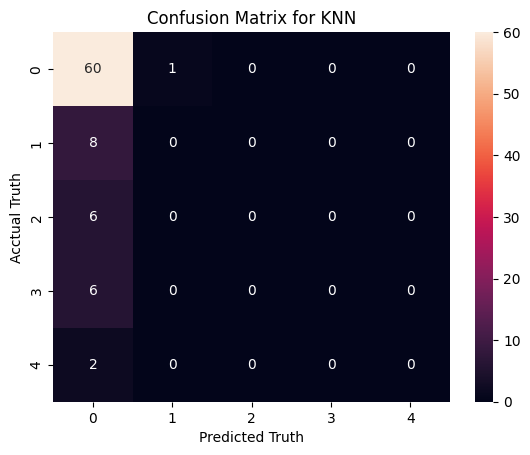

In [ ]:
basic_ml_model("KNN")

###### KNeighborsClassifier Base Model With tfidf method

 Train Accuracy : 0.7530487804878049 
 Test Accuracy : 0.7108433734939759

 >> KNN's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.97      0.84        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.15      0.19      0.17        83
weighted avg       0.55      0.71      0.62        83

__________________________________________________ 



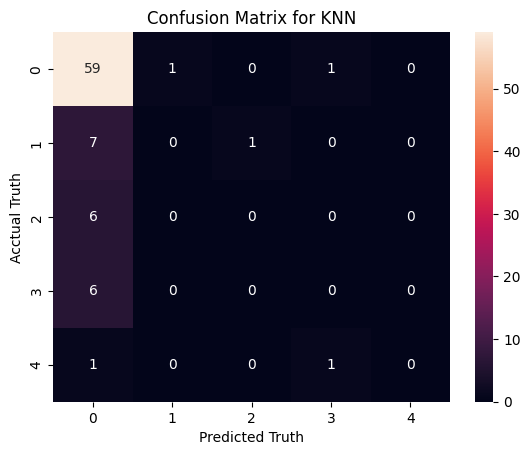

In [ ]:
basic_ml_model("KNN","tfidf")

###### KNeighborsClassifier Hypertuned Model With bow method

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
 Train Accuracy : 1.0 
 Test Accuracy : 0.7228915662650602

 >> KNN's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

__________________________________________________ 



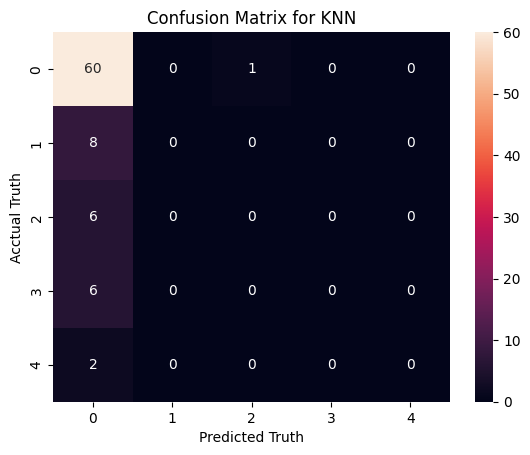

In [ ]:
basic_ml_model("KNN","bow", hypertuned=True)

###### KNeighborsClassifier Hypertuned Model With tfidf method

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
 Train Accuracy : 0.7378048780487805 
 Test Accuracy : 0.7349397590361446

 >> KNN's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83

__________________________________________________ 



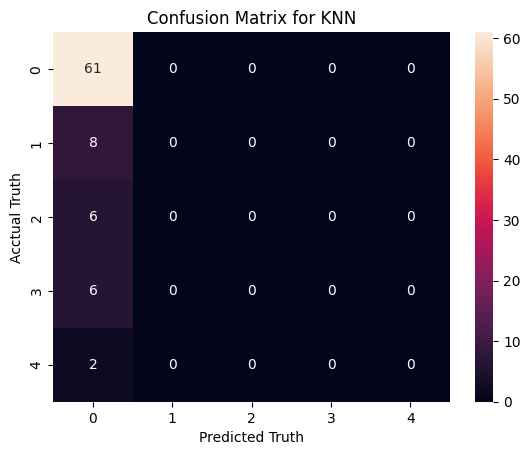

In [ ]:
basic_ml_model("KNN","tfidf", hypertuned=True)

###### KNeighborsClassifier Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
 Train Accuracy : 1.0 
 Test Accuracy : 0.7228915662650602

 >> KNN's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

__________________________________________________ 



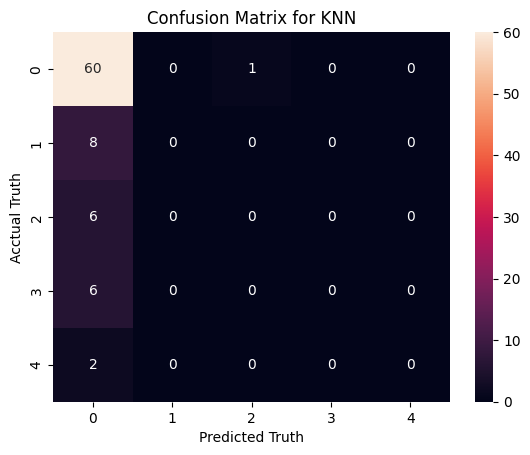

In [ ]:
basic_ml_model("KNN","bow", hypertuned=True,resample_data=True)

###### KNeighborsClassifier Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
 Train Accuracy : 0.7378048780487805 
 Test Accuracy : 0.7349397590361446

 >> KNN's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83

__________________________________________________ 



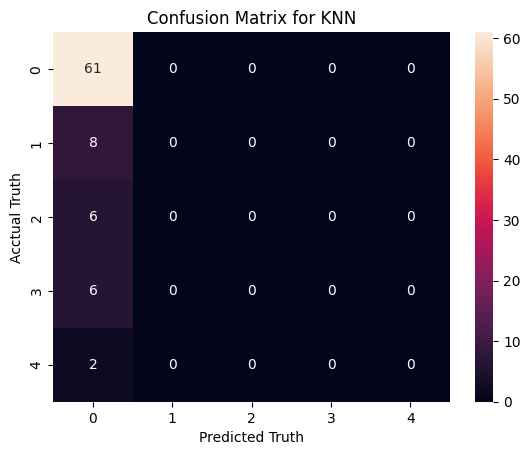

In [ ]:
basic_ml_model("KNN","tfidf", hypertuned=True,resample_data=True)

##### GradientBoostingClassifier

######GradientBoostingClassifier Base Model With Bow method

 Train Accuracy : 0.9664634146341463 
 Test Accuracy : 0.6626506024096386

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.71      0.90      0.80        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.14      0.18      0.16        83
weighted avg       0.52      0.66      0.59        83

__________________________________________________ 



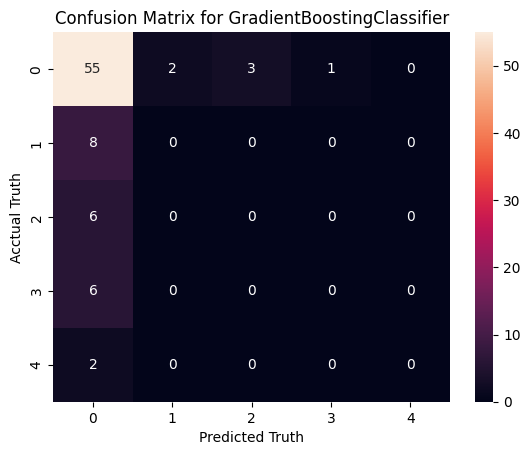

In [ ]:
basic_ml_model("GradientBoostingClassifier")

###### GradientBoostingClassifier Base Model With tfidf method

 Train Accuracy : 0.9969512195121951 
 Test Accuracy : 0.6265060240963856

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.63        83
   macro avg       0.15      0.17      0.16        83
weighted avg       0.54      0.63      0.58        83

__________________________________________________ 



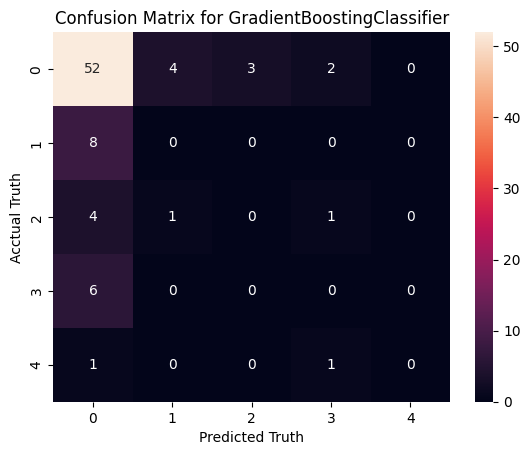

In [ ]:
basic_ml_model("GradientBoostingClassifier","tfidf")

###### GradientBoostingClassifier Hypertuned Model With bow method

Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
 Train Accuracy : 0.7957317073170732 
 Test Accuracy : 0.6746987951807228

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.72      0.92      0.81        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.67        83
   macro avg       0.14      0.18      0.16        83
weighted avg       0.53      0.67      0.59        83

__________________________________________________ 



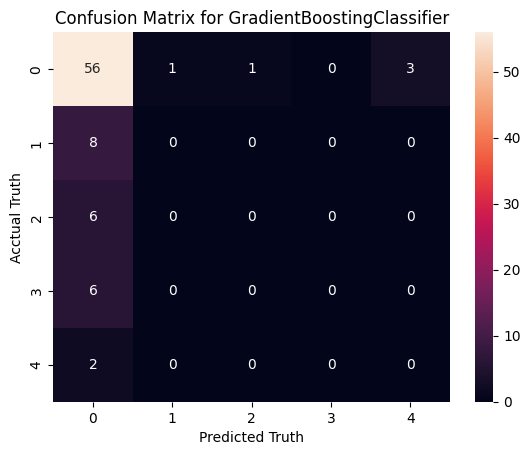

In [ ]:
basic_ml_model("GradientBoostingClassifier","bow", hypertuned=True)

###### GradientBoostingClassifier Hypertuned Model With tfidf method

Best Parameters : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 10}
 Train Accuracy : 0.7591463414634146 
 Test Accuracy : 0.7349397590361446

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83

__________________________________________________ 



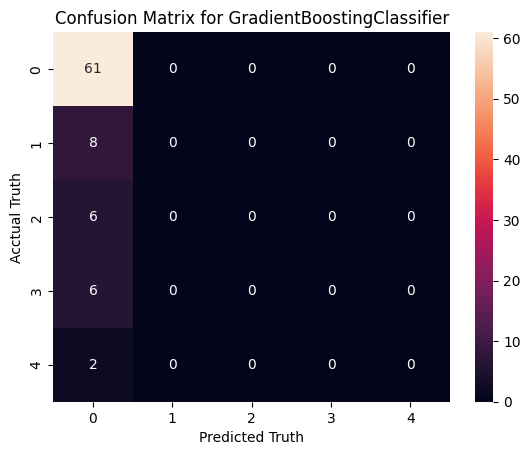

In [ ]:
basic_ml_model("GradientBoostingClassifier","tfidf", hypertuned=True)

###### GradientBoostingClassifier Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
 Train Accuracy : 0.7957317073170732 
 Test Accuracy : 0.6746987951807228

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.72      0.92      0.81        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.67        83
   macro avg       0.14      0.18      0.16        83
weighted avg       0.53      0.67      0.59        83

__________________________________________________ 



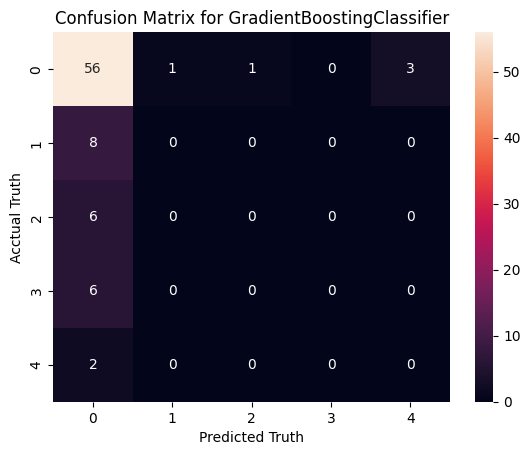

In [ ]:
basic_ml_model("GradientBoostingClassifier","bow", hypertuned=True,resample_data=True)

###### GradientBoostingClassifier Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 10}
 Train Accuracy : 0.7591463414634146 
 Test Accuracy : 0.7349397590361446

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83

__________________________________________________ 



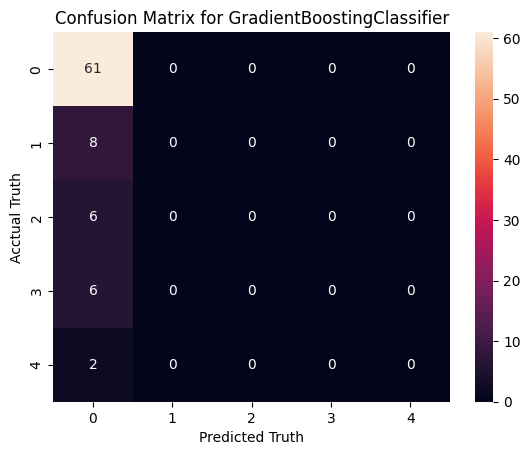

In [ ]:
basic_ml_model("GradientBoostingClassifier","tfidf", hypertuned=True,resample_data=True)

##### BaggingClassifier

######BaggingClassifier Base Model With Bow method

 Train Accuracy : 0.9085365853658537 
 Test Accuracy : 0.7228915662650602

 >> BaggingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.74      0.95      0.83        61
           2       0.00      0.00      0.00         8
           3       0.50      0.33      0.40         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.25      0.26      0.25        83
weighted avg       0.58      0.72      0.64        83

__________________________________________________ 



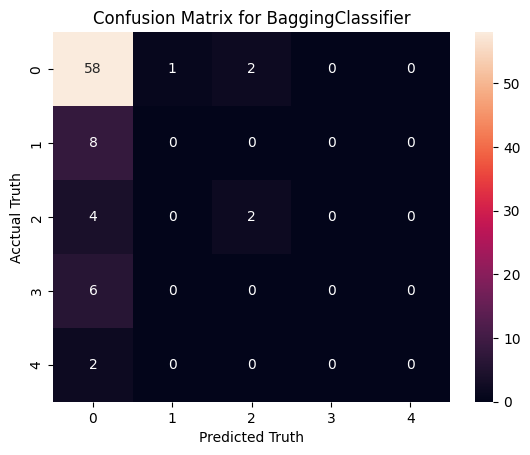

In [ ]:
basic_ml_model("BaggingClassifier")

###### BaggingClassifier Base Model With tfidf method

 Train Accuracy : 0.9085365853658537 
 Test Accuracy : 0.6867469879518072

 >> BaggingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.72      0.93      0.81        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.14      0.19      0.16        83
weighted avg       0.53      0.69      0.60        83

__________________________________________________ 



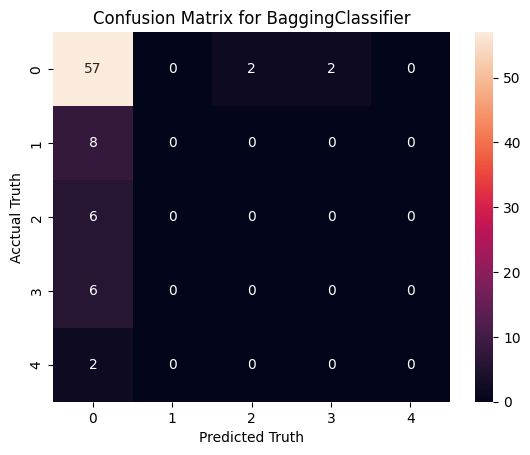

In [ ]:
basic_ml_model("BaggingClassifier","tfidf")

###### BaggingClassifier Hypertuned Model With bow method

Best Parameters : {'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
 Train Accuracy : 1.0 
 Test Accuracy : 0.6867469879518072

 >> BaggingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.93      0.82        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.15      0.19      0.16        83
weighted avg       0.54      0.69      0.60        83

__________________________________________________ 



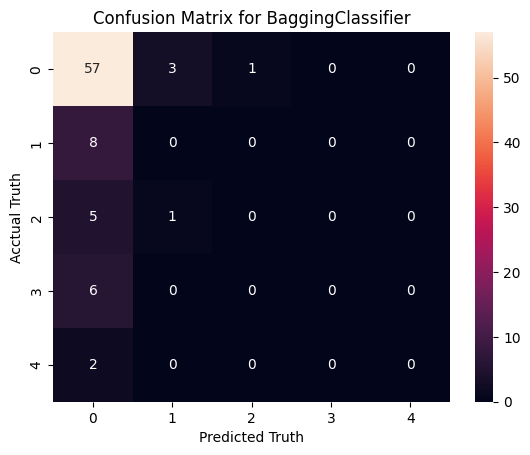

In [ ]:
basic_ml_model("BaggingClassifier","bow", hypertuned=True)

###### BaggingClassifier Hypertuned Model With tfidf method

Best Parameters : {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
 Train Accuracy : 0.8567073170731707 
 Test Accuracy : 0.7228915662650602

 >> BaggingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

__________________________________________________ 



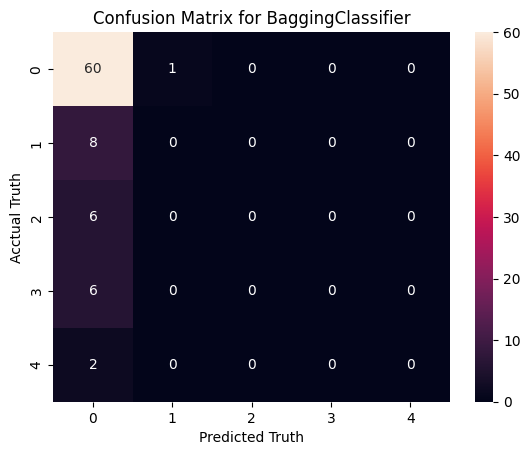

In [ ]:
basic_ml_model("BaggingClassifier","tfidf", hypertuned=True)

###### BaggingClassifier Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
 Train Accuracy : 1.0 
 Test Accuracy : 0.6867469879518072

 >> BaggingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.93      0.82        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.15      0.19      0.16        83
weighted avg       0.54      0.69      0.60        83

__________________________________________________ 



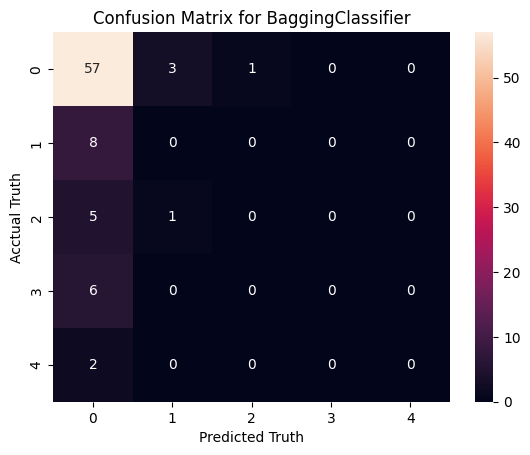

In [ ]:
basic_ml_model("BaggingClassifier","bow", hypertuned=True,resample_data=True)

###### BaggingClassifier Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}
 Train Accuracy : 0.8567073170731707 
 Test Accuracy : 0.7228915662650602

 >> BaggingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.72        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.72      0.62        83

__________________________________________________ 



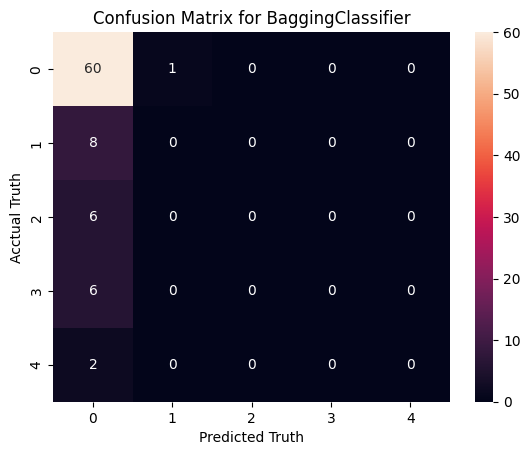

In [ ]:
basic_ml_model("BaggingClassifier","tfidf", hypertuned=True,resample_data=True)

##### AdaBoostClassifier

######AdaBoostClassifier Base Model With Bow method

 Train Accuracy : 0.7347560975609756 
 Test Accuracy : 0.6987951807228916

 >> AdaBoostClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.74      0.93      0.83        61
           2       0.00      0.00      0.00         8
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.70        83
   macro avg       0.35      0.22      0.22        83
weighted avg       0.62      0.70      0.63        83

__________________________________________________ 



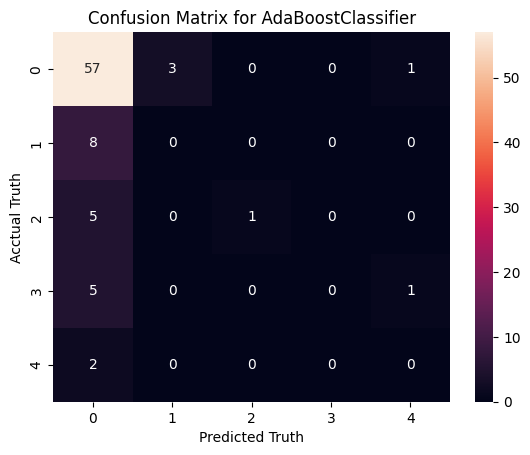

In [ ]:
basic_ml_model("AdaBoostClassifier")

###### AdaBoostClassifier Base Model With tfidf method

 Train Accuracy : 0.75 
 Test Accuracy : 0.7108433734939759

 >> AdaBoostClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.97      0.83        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.15      0.19      0.17        83
weighted avg       0.54      0.71      0.61        83

__________________________________________________ 



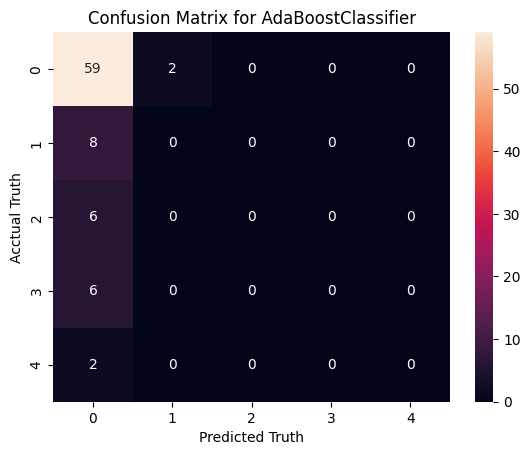

In [ ]:
basic_ml_model("AdaBoostClassifier","tfidf")

###### AdaBoostClassifier Hypertuned Model With bow method

Best Parameters : {'learning_rate': 0.5, 'n_estimators': 50}
 Train Accuracy : 0.6920731707317073 
 Test Accuracy : 0.6626506024096386

 >> AdaBoostClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.89      0.80        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.20      0.21      0.20        83
weighted avg       0.55      0.66      0.60        83

__________________________________________________ 



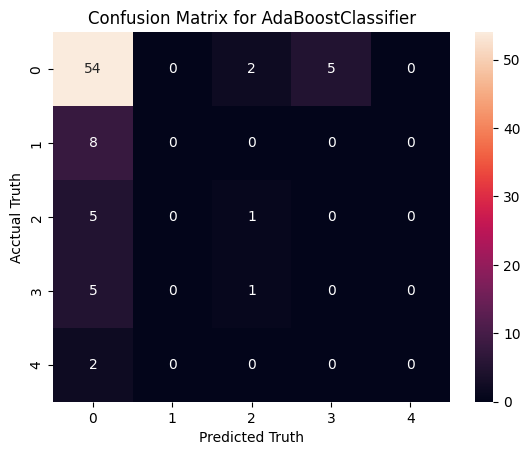

In [ ]:
basic_ml_model("AdaBoostClassifier","bow", hypertuned=True)

###### AdaBoostClassifier Hypertuned Model With tfidf method

Best Parameters : {'learning_rate': 0.5, 'n_estimators': 70}
 Train Accuracy : 0.7225609756097561 
 Test Accuracy : 0.7108433734939759

 >> AdaBoostClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.97      0.83        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.15      0.19      0.17        83
weighted avg       0.54      0.71      0.61        83

__________________________________________________ 



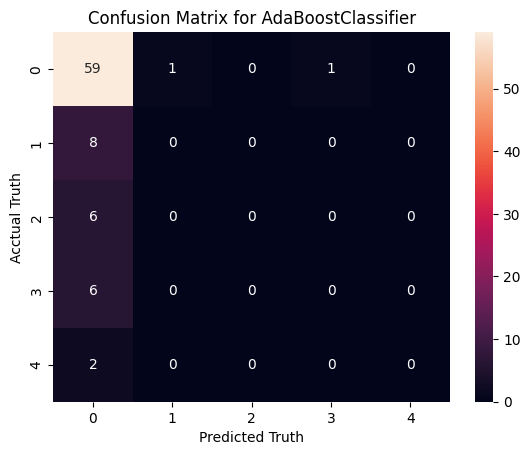

In [ ]:
basic_ml_model("AdaBoostClassifier","tfidf", hypertuned=True)

###### AdaBoostClassifier Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'learning_rate': 0.5, 'n_estimators': 50}
 Train Accuracy : 0.6920731707317073 
 Test Accuracy : 0.6626506024096386

 >> AdaBoostClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.89      0.80        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.20      0.21      0.20        83
weighted avg       0.55      0.66      0.60        83

__________________________________________________ 



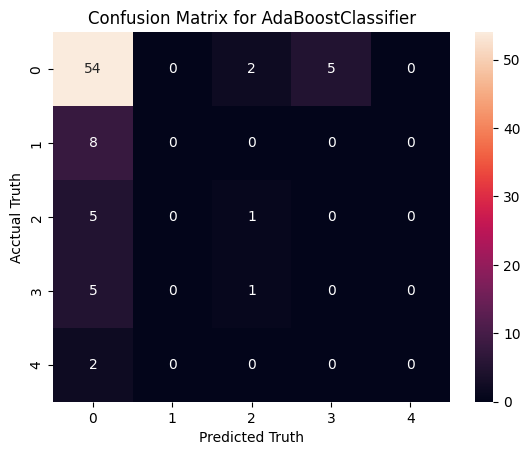

In [ ]:
basic_ml_model("AdaBoostClassifier","bow", hypertuned=True,resample_data=True)

###### AdaBoostClassifier Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'learning_rate': 0.5, 'n_estimators': 70}
 Train Accuracy : 0.7225609756097561 
 Test Accuracy : 0.7108433734939759

 >> AdaBoostClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.97      0.83        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.15      0.19      0.17        83
weighted avg       0.54      0.71      0.61        83

__________________________________________________ 



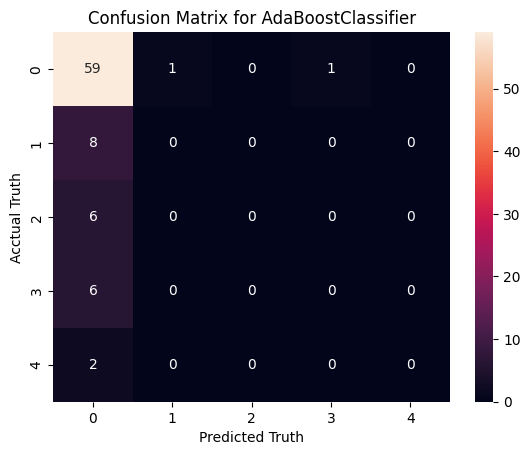

In [ ]:
basic_ml_model("AdaBoostClassifier","tfidf", hypertuned=True,resample_data=True)

##### RandomForestClassifier

######RandomForestClassifier Base Model With Bow method

 Train Accuracy : 0.7713414634146342 
 Test Accuracy : 0.46987951807228917

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.71      0.61      0.65        61
           2       0.00      0.00      0.00         8
           3       0.17      0.17      0.17         6
           4       0.11      0.17      0.13         6
           5       0.00      0.00      0.00         2

    accuracy                           0.47        83
   macro avg       0.20      0.19      0.19        83
weighted avg       0.54      0.47      0.50        83

__________________________________________________ 



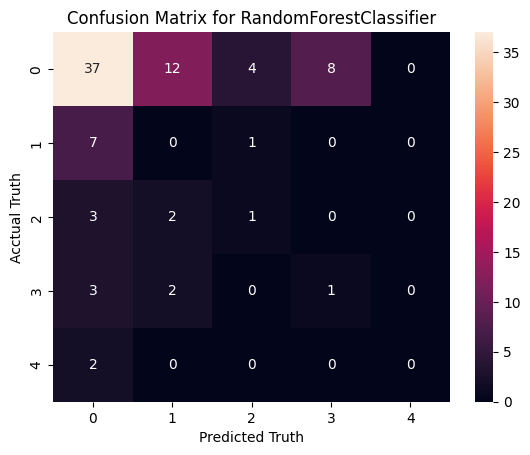

In [ ]:
basic_ml_model("RandomForestClassifier")

###### RandomForestClassifier Base Model With tfidf method

 Train Accuracy : 0.7286585365853658 
 Test Accuracy : 0.40963855421686746

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.71      0.49      0.58        61
           2       0.00      0.00      0.00         8
           3       0.12      0.33      0.18         6
           4       0.13      0.33      0.19         6
           5       0.00      0.00      0.00         2

    accuracy                           0.41        83
   macro avg       0.19      0.23      0.19        83
weighted avg       0.54      0.41      0.46        83

__________________________________________________ 



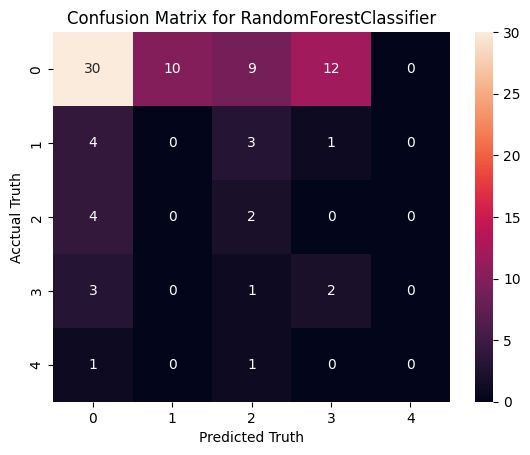

In [ ]:
basic_ml_model("RandomForestClassifier","tfidf")

###### RandomForestClassifier Hypertuned Model With bow method

Best Parameters : {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
 Train Accuracy : 0.8902439024390244 
 Test Accuracy : 0.6385542168674698

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.82      0.80      0.81        61
           2       0.11      0.12      0.12         8
           3       0.12      0.17      0.14         6
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         2

    accuracy                           0.64        83
   macro avg       0.29      0.29      0.29        83
weighted avg       0.65      0.64      0.64        83

__________________________________________________ 



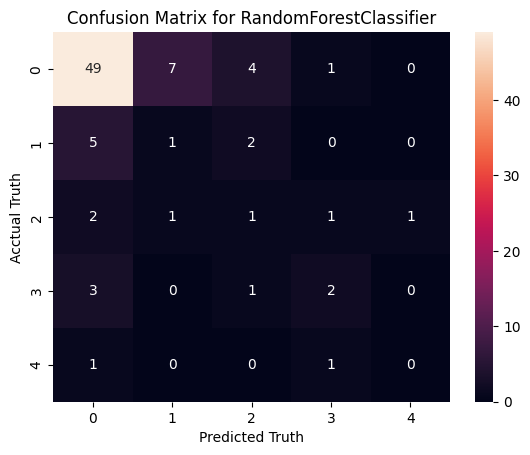

In [ ]:
basic_ml_model("RandomForestClassifier","bow", hypertuned=True)

###### RandomForestClassifier Hypertuned Model With tfidf method

Best Parameters : {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
 Train Accuracy : 0.9115853658536586 
 Test Accuracy : 0.5783132530120482

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.74      0.73        61
           2       0.12      0.12      0.12         8
           3       0.00      0.00      0.00         6
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         2

    accuracy                           0.58        83
   macro avg       0.25      0.24      0.24        83
weighted avg       0.57      0.58      0.58        83

__________________________________________________ 



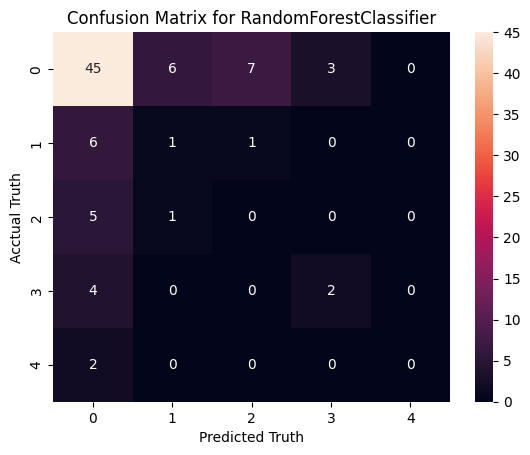

In [ ]:
basic_ml_model("RandomForestClassifier","tfidf", hypertuned=True)

###### RandomForestClassifier Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
 Train Accuracy : 0.8902439024390244 
 Test Accuracy : 0.6385542168674698

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.82      0.80      0.81        61
           2       0.11      0.12      0.12         8
           3       0.12      0.17      0.14         6
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         2

    accuracy                           0.64        83
   macro avg       0.29      0.29      0.29        83
weighted avg       0.65      0.64      0.64        83

__________________________________________________ 


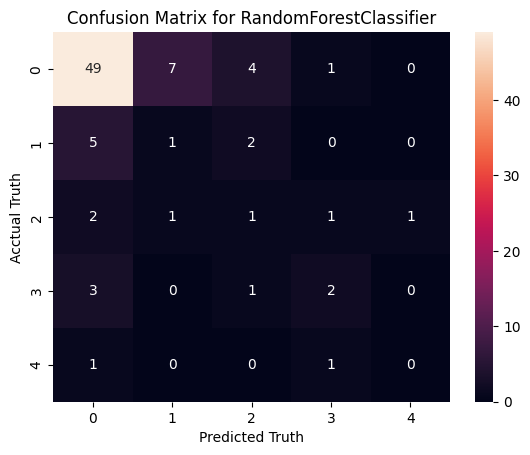

In [ ]:
basic_ml_model("RandomForestClassifier","bow", hypertuned=True,resample_data=True)

###### RandomForestClassifier Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
 Train Accuracy : 0.9115853658536586 
 Test Accuracy : 0.5783132530120482

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.74      0.73        61
           2       0.12      0.12      0.12         8
           3       0.00      0.00      0.00         6
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         2

    accuracy                           0.58        83
   macro avg       0.25      0.24      0.24        83
weighted avg       0.57      0.58      0.58        83

__________________________________________________ 


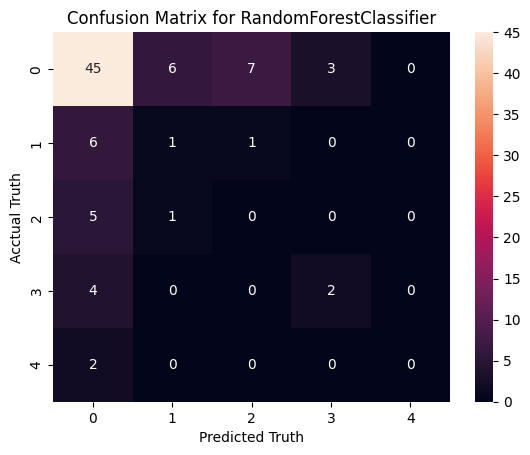

In [ ]:
basic_ml_model("RandomForestClassifier","tfidf", hypertuned=True,resample_data=True)

##### Decision Tree Classifier

######Decision Tree Classifier Base Model With Bow method

 Train Accuracy : 0.15853658536585366 
 Test Accuracy : 0.0963855421686747

 >> Decision Tree Classifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.50      0.02      0.03        61
           2       0.10      0.88      0.17         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.10        83
   macro avg       0.12      0.18      0.04        83
weighted avg       0.38      0.10      0.04        83

__________________________________________________ 



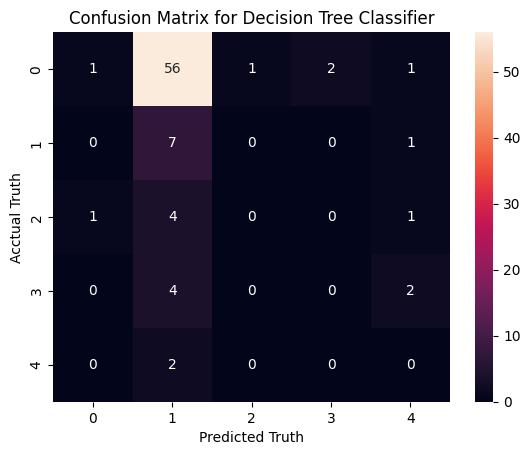

In [ ]:
basic_ml_model("Decision Tree Classifier")

###### Decision Tree Classifier Base Model With tfidf method

 Train Accuracy : 0.1524390243902439 
 Test Accuracy : 0.10843373493975904

 >> Decision Tree Classifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       1.00      0.02      0.03        61
           2       0.08      0.75      0.15         8
           3       0.33      0.17      0.22         6
           4       0.33      0.17      0.22         6
           5       0.00      0.00      0.00         2

    accuracy                           0.11        83
   macro avg       0.35      0.22      0.13        83
weighted avg       0.79      0.11      0.07        83

__________________________________________________ 



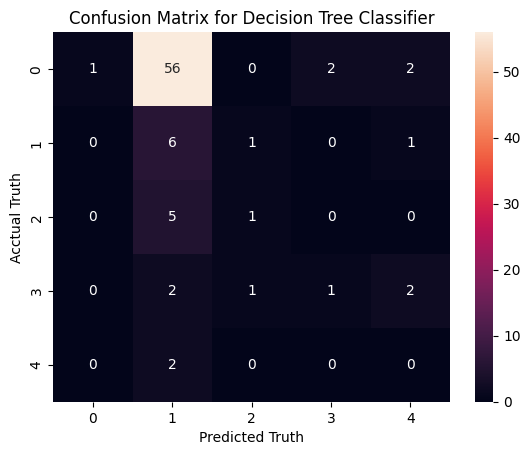

In [ ]:
basic_ml_model("Decision Tree Classifier","tfidf")

###### Decision Tree Classifier Hypertuned Model With bow method

Best Parameters : {'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
 Train Accuracy : 0.850609756097561 
 Test Accuracy : 0.6626506024096386

 >> Decision Tree Classifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.87      0.80        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.23      0.24      0.23        83
weighted avg       0.58      0.66      0.62        83

__________________________________________________ 



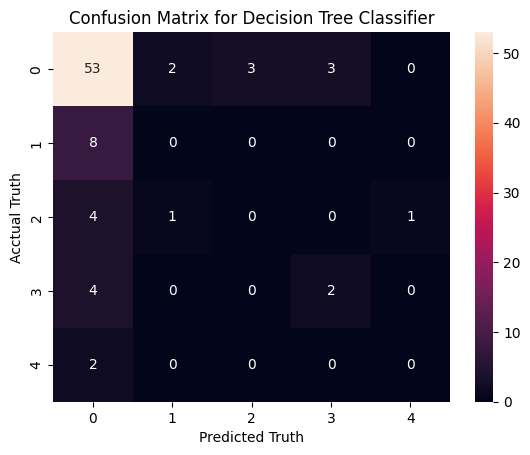

In [ ]:
basic_ml_model("Decision Tree Classifier","bow", hypertuned=True)

###### Decision Tree Classifier Hypertuned Model With tfidf method

Best Parameters : {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
 Train Accuracy : 0.7926829268292683 
 Test Accuracy : 0.6626506024096386

 >> Decision Tree Classifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.89      0.80        61
           2       0.00      0.00      0.00         8
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.18      0.21      0.19        83
weighted avg       0.55      0.66      0.60        83

__________________________________________________ 



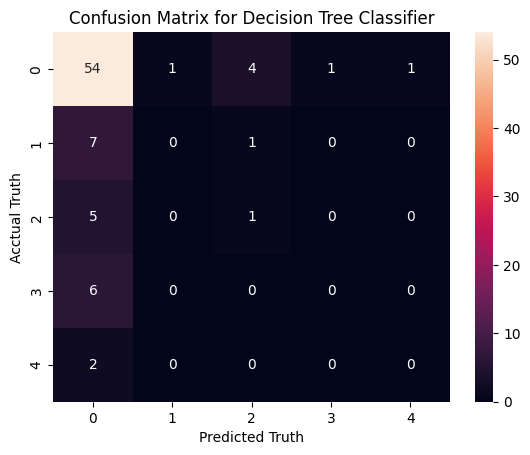

In [ ]:
basic_ml_model("Decision Tree Classifier","tfidf", hypertuned=True)

###### Decision Tree Classifier Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'class_weight': None, 'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}
 Train Accuracy : 0.8963414634146342 
 Test Accuracy : 0.6626506024096386

 >> Decision Tree Classifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.77      0.89      0.82        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.50      0.17      0.25         6
           5       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.25      0.21      0.21        83
weighted avg       0.60      0.66      0.62        83

__________________________________________________ 



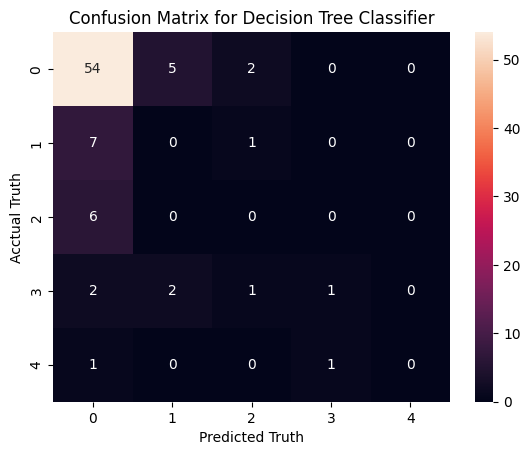

In [ ]:
basic_ml_model("Decision Tree Classifier","bow", hypertuned=True,resample_data=True)

###### Decision Tree Classifier Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
 Train Accuracy : 0.7621951219512195 
 Test Accuracy : 0.7108433734939759

 >> Decision Tree Classifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.97      0.83        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.71        83
   macro avg       0.15      0.19      0.17        83
weighted avg       0.54      0.71      0.61        83

__________________________________________________ 



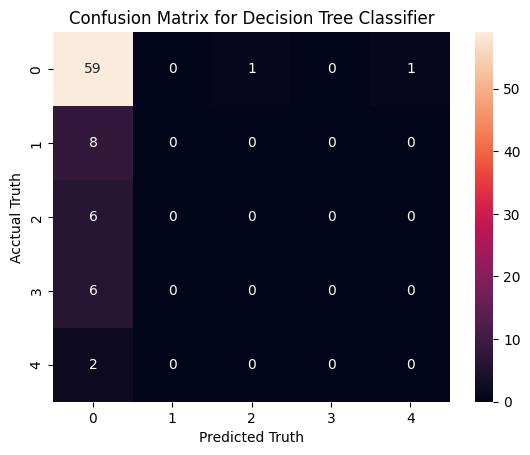

In [ ]:
basic_ml_model("Decision Tree Classifier","tfidf", hypertuned=True,resample_data=True)

##### Logistic Regression

######Logistic Regression Base Model With Bow method

 Train Accuracy : 0.9878048780487805 
 Test Accuracy : 0.6867469879518072

 >> Logistic Regression's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.25      0.17      0.20         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.25      0.25      0.24        83
weighted avg       0.59      0.69      0.63        83

__________________________________________________ 



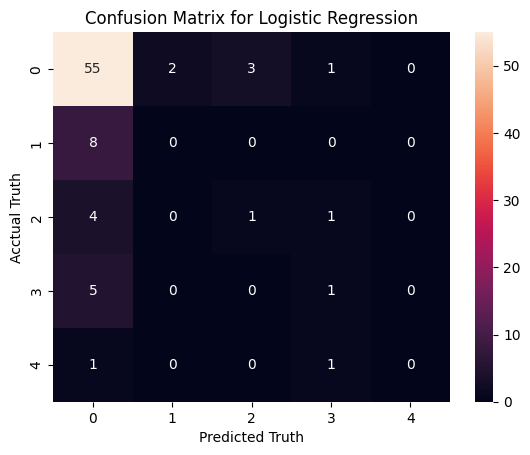

In [ ]:
basic_ml_model("Logistic Regression")

###### Logistic Regression Base Model With tfidf method

 Train Accuracy : 0.7378048780487805 
 Test Accuracy : 0.7349397590361446

 >> Logistic Regression's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.73        83
   macro avg       0.15      0.20      0.17        83
weighted avg       0.54      0.73      0.62        83

__________________________________________________ 



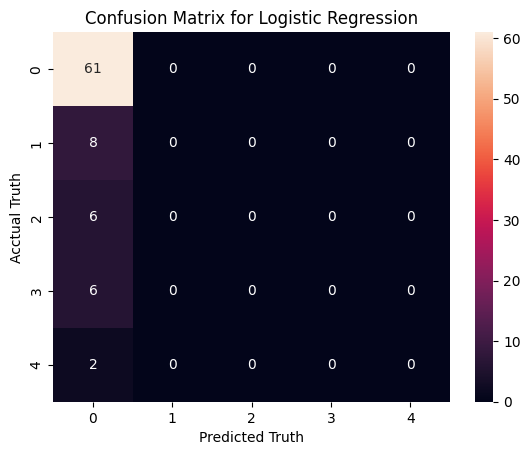

In [ ]:
basic_ml_model("Logistic Regression","tfidf")

###### Logistic Regression Hypertuned Model With bow method

Best Parameters : {'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
 Train Accuracy : 0.9878048780487805 
 Test Accuracy : 0.6867469879518072

 >> Logistic Regression's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.25      0.17      0.20         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.25      0.25      0.24        83
weighted avg       0.59      0.69      0.63        83

__________________________________________________ 



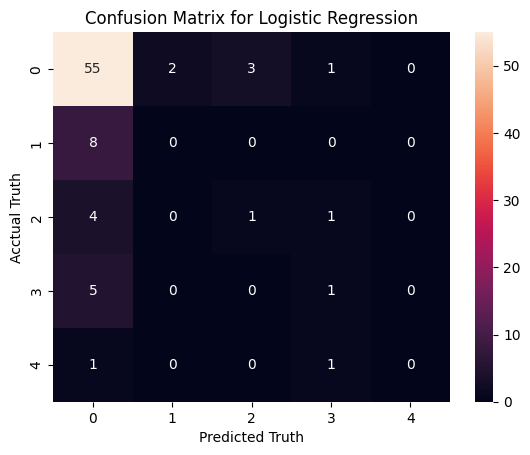

In [ ]:
basic_ml_model("Logistic Regression","bow", hypertuned=True)

###### Logistic Regression Hypertuned Model With tfidf method

Best Parameters : {'class_weight': None, 'penalty': None, 'solver': 'newton-cg'}
 Train Accuracy : 1.0 
 Test Accuracy : 0.5783132530120482

 >> Logistic Regression's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.75      0.74        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.20      0.33      0.25         6
           5       0.00      0.00      0.00         2

    accuracy                           0.58        83
   macro avg       0.19      0.22      0.20        83
weighted avg       0.55      0.58      0.56        83

__________________________________________________ 



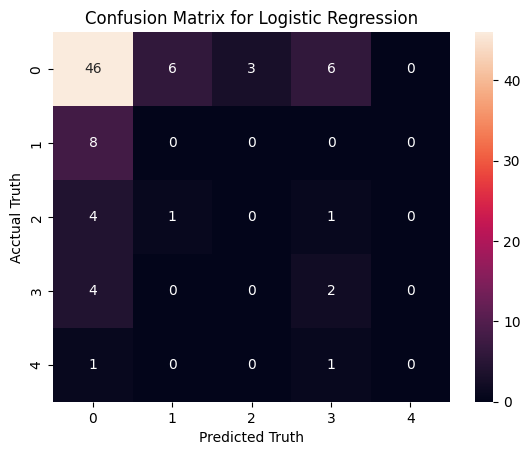

In [ ]:
basic_ml_model("Logistic Regression","tfidf", hypertuned=True)

###### Logistic Regression Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
 Train Accuracy : 0.9878048780487805 
 Test Accuracy : 0.6867469879518072

 >> Logistic Regression's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.25      0.17      0.20         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.25      0.25      0.24        83
weighted avg       0.59      0.69      0.63        83

__________________________________________________ 



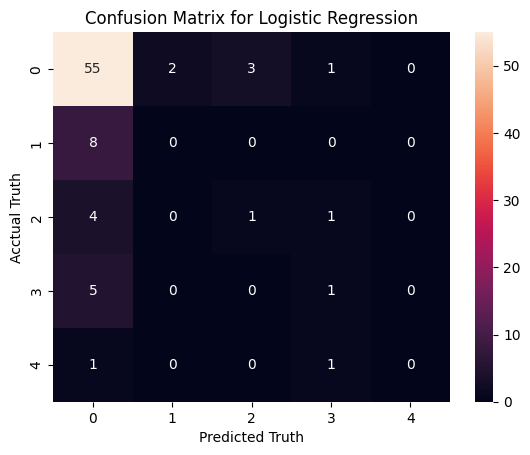

In [ ]:
basic_ml_model("Logistic Regression","bow", hypertuned=True,resample_data=True)

###### Logistic Regression Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'class_weight': None, 'penalty': None, 'solver': 'newton-cg'}
 Train Accuracy : 1.0 
 Test Accuracy : 0.5783132530120482

 >> Logistic Regression's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.73      0.75      0.74        61
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.20      0.33      0.25         6
           5       0.00      0.00      0.00         2

    accuracy                           0.58        83
   macro avg       0.19      0.22      0.20        83
weighted avg       0.55      0.58      0.56        83

__________________________________________________ 



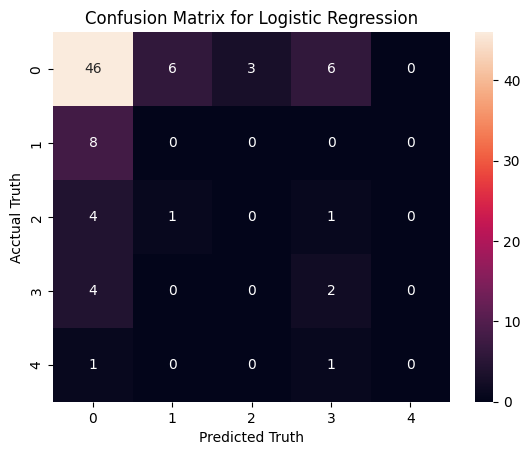

In [ ]:
basic_ml_model("Logistic Regression","tfidf", hypertuned=True,resample_data=True)

##### SVM

######SVM Base Model With Bow method

 Train Accuracy : 0.9878048780487805 
 Test Accuracy : 0.6024096385542169

 >> SVM's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.77      0.76        61
           2       0.00      0.00      0.00         8
           3       0.12      0.17      0.14         6
           4       0.40      0.33      0.36         6
           5       0.00      0.00      0.00         2

    accuracy                           0.60        83
   macro avg       0.25      0.25      0.25        83
weighted avg       0.59      0.60      0.59        83

__________________________________________________ 



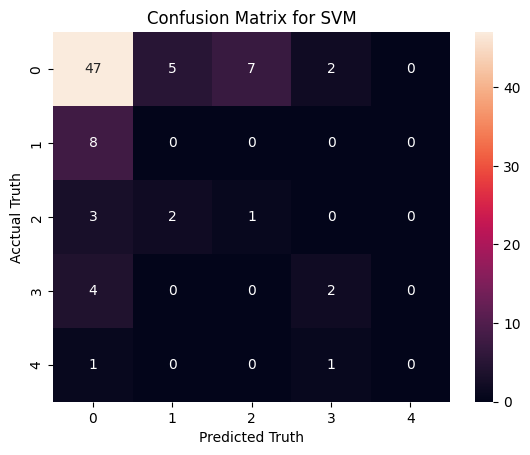

In [ ]:
basic_ml_model("SVM")

###### SVM Base Model With tfidf method

 Train Accuracy : 0.875 
 Test Accuracy : 0.5783132530120482

 >> SVM's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.80      0.74      0.77        61
           2       0.00      0.00      0.00         8
           3       0.10      0.17      0.12         6
           4       0.20      0.33      0.25         6
           5       0.00      0.00      0.00         2

    accuracy                           0.58        83
   macro avg       0.22      0.25      0.23        83
weighted avg       0.61      0.58      0.59        83

__________________________________________________ 



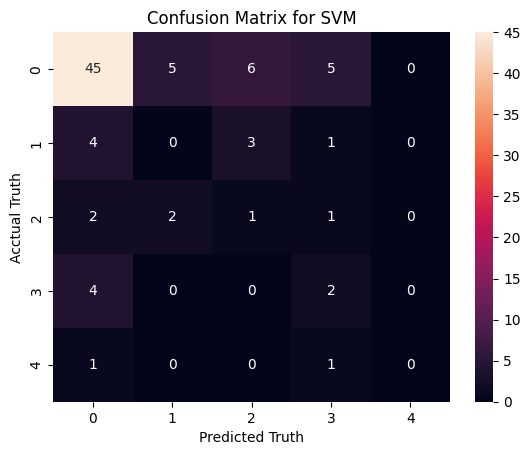

In [ ]:
basic_ml_model("SVM","tfidf")

###### SVM Hypertuned Model With bow method

Best Parameters : {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
 Train Accuracy : 0.9969512195121951 
 Test Accuracy : 0.6867469879518072

 >> SVM's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        61
           2       0.00      0.00      0.00         8
           3       0.20      0.17      0.18         6
           4       1.00      0.17      0.29         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.39      0.25      0.26        83
weighted avg       0.64      0.69      0.64        83

__________________________________________________ 



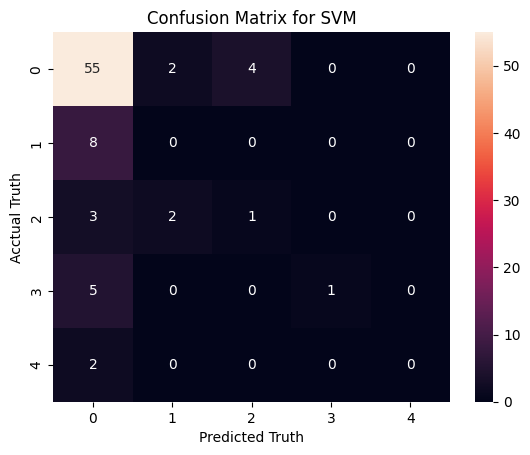

In [ ]:
basic_ml_model("SVM","bow", hypertuned=True)

###### SVM Hypertuned Model With tfidf method

Best Parameters : {'C': 100, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
 Train Accuracy : 0.9969512195121951 
 Test Accuracy : 0.6385542168674698

 >> SVM's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.74      0.85      0.79        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.64        83
   macro avg       0.20      0.20      0.20        83
weighted avg       0.56      0.64      0.60        83

__________________________________________________ 



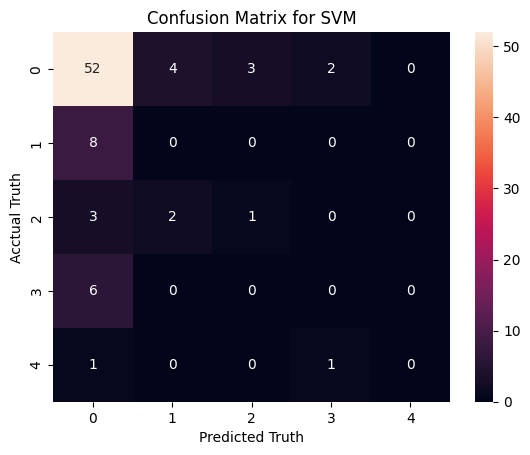

In [ ]:
basic_ml_model("SVM","tfidf", hypertuned=True)

###### SVM Hypertuned Model With bow method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
 Train Accuracy : 0.9969512195121951 
 Test Accuracy : 0.6867469879518072

 >> SVM's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        61
           2       0.00      0.00      0.00         8
           3       0.20      0.17      0.18         6
           4       1.00      0.17      0.29         6
           5       0.00      0.00      0.00         2

    accuracy                           0.69        83
   macro avg       0.39      0.25      0.26        83
weighted avg       0.64      0.69      0.64        83

__________________________________________________ 



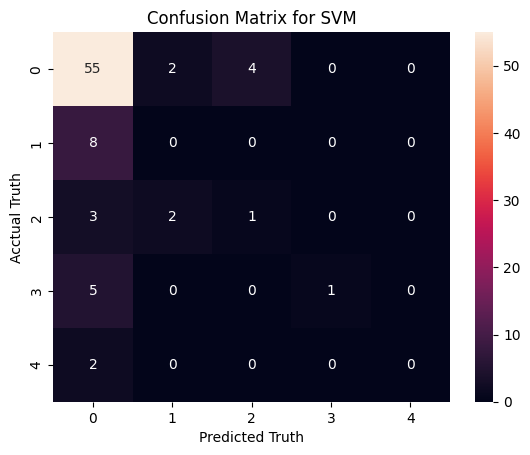

In [ ]:
basic_ml_model("SVM","bow", hypertuned=True,resample_data=True)

###### SVM Hypertuned Model With tfidf method with Resampling

Resampling...
label
1    242
3    242
4    242
2    242
5    242
Name: count, dtype: int64
Best Parameters : {'C': 100, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
 Train Accuracy : 0.9969512195121951 
 Test Accuracy : 0.6385542168674698

 >> SVM's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.74      0.85      0.79        61
           2       0.00      0.00      0.00         8
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2

    accuracy                           0.64        83
   macro avg       0.20      0.20      0.20        83
weighted avg       0.56      0.64      0.60        83

__________________________________________________ 



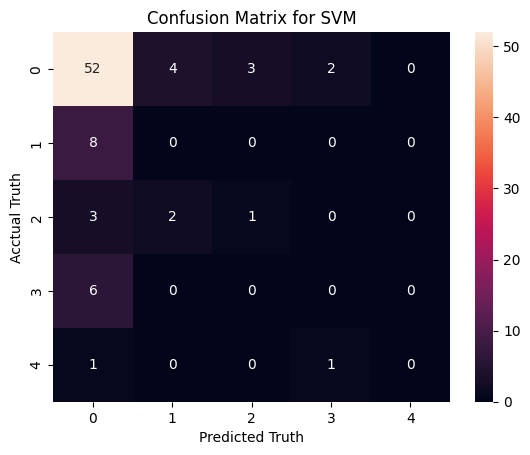

In [ ]:
basic_ml_model("SVM","tfidf", hypertuned=True,resample_data=True)

####Results


In [ ]:
Model_results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Method,HyperTuning,Best Parameters,Resample
0,KNN,0.737805,0.722892,0.537761,0.722892,0.616733,bow,False,,False
1,KNN,0.753049,0.710843,0.548879,0.710843,0.619449,tfidf,False,,False
2,KNN,1.000000,0.722892,0.537761,0.722892,0.616733,bow,True,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}",False
3,KNN,0.737805,0.734940,0.540136,0.734940,0.622657,tfidf,True,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}",False
4,KNN,1.000000,0.722892,0.537761,0.722892,0.616733,bow,True,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}",True
5,KNN,0.737805,0.734940,0.540136,0.734940,0.622657,tfidf,True,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}",True
6,GradientBoostingClassifier,0.966463,0.662651,0.524957,0.662651,0.585822,bow,False,,False
7,GradientBoostingClassifier,0.996951,0.626506,0.538266,0.626506,0.579043,tfidf,False,,False
8,GradientBoostingClassifier,0.795732,0.674699,0.527649,0.674699,0.592182,bow,True,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}",False
9,GradientBoostingClassifier,0.759146,0.734940,0.540136,0.734940,0.622657,tfidf,True,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 10}",False




*   In total We trained our models on 8 different classifiers.
  *   KNN,SVM,Logistic Regression,Decision Tree,RandomForest,AdaBoost,Bagging and GradientBoosting.
*   For each of the classifiers, we tested both BagofWords and TF-IDF for word vecotirastion.
*   We did GridSearch for Hyper parameter tuning of each model
*   As we noticed that the data is highly imbalanced, we also tested out upsampling using SMOTE.
*  In general, all models provided better results with TF-IDF vectorization.
*  In terms of accuracy and recall, KNN and GradientBoostingClassifier provided the best results on test set with 73% after hyper parameter tuning.
*  Random Forest classifiers were able to predict minority classes also. Other models were not able to predict the minority classes well.







# Milestone 2

In the Milestone 1, we have tested traditional Machine Learning approach to predict the Accident Level based on the description. We noticed that


*   Our models are overfitting due to class imbalance.
*   Our models doesnot have a good accuracy when it comes to process texts.

Inorder to overcome these, in the Milestone2, we will be

*   Balancing our dataset
  *  By Merging minority classes.
  *  By Generating Synthetic data for minority classes using GenAI Models.
*   Training our models using Deep Learning Techniques
  *   Neural Networks
  *   RNN
  *   LSTM
  *   BERT

## Grouping Minority Classes and Testing ML Models

Let's analyse the current distribution of classes

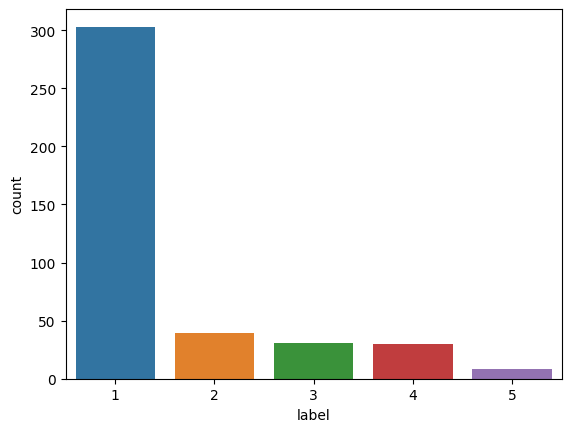

In [ ]:
sns.countplot(df_final, x='label', order=df_final['label'].value_counts().index);

We will merge Class 2 and 3 to Class2 and Class4 and 5 to Class 3

In [ ]:
# Define the mapping of labels
label_mapping = {
    2: 2,  # Merge 2 into group 1
    3: 2,  # Merge 3 into group 1
    4: 3,  # Merge 4 into group 2
    5: 3   # Merge 5 into group 2
}

df_final['merged_label'] = df_final['label'].replace(label_mapping)

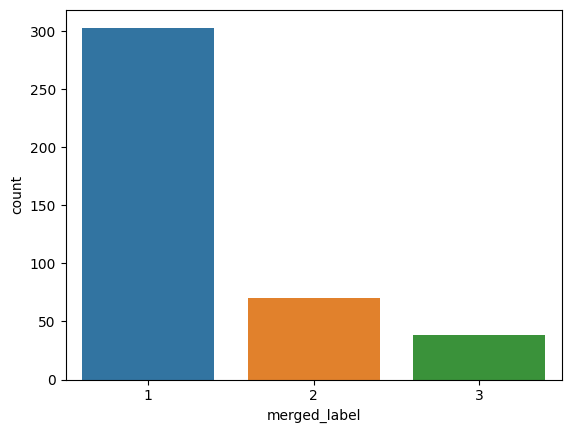

In [ ]:
sns.countplot(df_final, x='merged_label', order=df_final['merged_label'].value_counts().index);

In [ ]:
# Defining X and y Variables
X = df_final['cleaned_text']
Y = df_final['merged_label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 20)

### GradientBoostingClassifier

 Train Accuracy : 0.9237804878048781 
 Test Accuracy : 0.6385542168674698

 >> GradientBoostingClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.82      0.78        61
           2       0.20      0.21      0.21        14
           3       0.00      0.00      0.00         8

    accuracy                           0.64        83
   macro avg       0.32      0.34      0.33        83
weighted avg       0.58      0.64      0.61        83

__________________________________________________ 



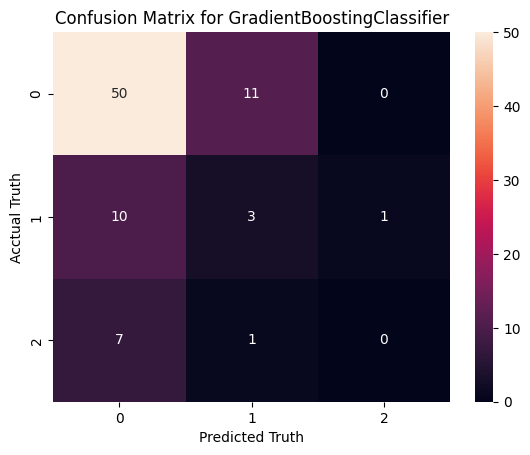

In [ ]:
basic_ml_model("GradientBoostingClassifier","tfidf",X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### RandomForestClassifier

 Train Accuracy : 0.8445121951219512 
 Test Accuracy : 0.6024096385542169

 >> RandomForestClassifier's Classification performance Report 

__________________________________________________ 

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        61
           2       0.21      0.21      0.21        14
           3       0.12      0.12      0.12         8

    accuracy                           0.60        83
   macro avg       0.36      0.36      0.36        83
weighted avg       0.60      0.60      0.60        83

__________________________________________________ 



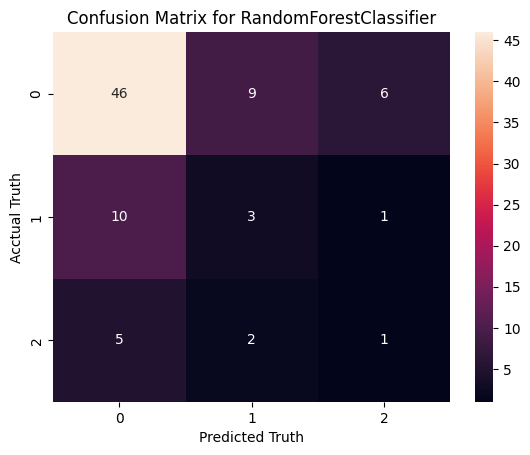

In [ ]:
basic_ml_model("RandomForestClassifier","bow",X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### Conclusion



*   We have seen in Milestone1, GradientBoostingClassifier and RandomForestClassifier gave us best results.So we trained the new classes with same 2 models.
*   GradientBoostingClassifier were able to classfiy Class 2 now, but even now model couldn't predict Class3.
*   RandomForestClassifier performance improved, but not as much as we need while predicting minority classes.

In the next steps, we will generate synthetic data using LLMs for minority classes and use them with Deep Learning Models for predicting accident levels.



## Synthetic Data Generator using LLM - Mistral Instruct V0.3

In [ ]:
from huggingface_hub import login

#Get access to use the Mistral Instruct V0.3 with your HuggingFace account and provide the API token
login("hf_McNRyQjFXXXXXXXXXXXXXvWheHXXXX")

model_name = "mistralai/Mistral-7B-Instruct-v0.3"

In [ ]:
def extract_accident_description(text: str) -> str:
    """
    Extracts the accident description from the LLM output by removing prompt instructions,
    bullet points, and unnecessary formatting.

    Args:
        text (str): The raw text generated by the model.

    Returns:
        str: Cleaned accident description.
    """
    # Remove bullet points, list markers, or prompt instructions (e.g., '- Unique')
    text = re.sub(r"^\s*[-\u2022]\s*.*$", "", text, flags=re.MULTILINE)

    # Remove unnecessary empty lines
    text = re.sub(r"\n{2,}", "\n", text).strip()

    # Return cleaned text starting from the first full sentence
    match = re.search(r"([A-Z][^.!?]*[.!?](?:\s|$))", text)  # Start from the first full sentence
    return match.group(0) + text[match.end():].strip() if match else text

In [ ]:
class DatasetBalancer:
    def __init__(self,
                 model_name: str = "mistralai/Mistral-7B-Instruct-v0.3",
                 device: Optional[str] = None):
        """
        Initialize the DatasetBalancer with Mistral 7B Instruct model

        Args:
            model_name (str): Hugging Face model identifier
            device (str, optional): Compute device (cuda/cpu). Defaults to auto-detection.
        """
        # Auto-detect device if not specified
        if device is None:
            device = "cuda" if torch.cuda.is_available() else "cpu"

        # Load tokenizer and model
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        # Set pad token if not already set
        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

        self.model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float16 if device == "cuda" else torch.float32,
            device_map=device
        )
        self.device = device

    def generate_synthetic_description(
        self,
        messages: List[Dict[str, str]],
        max_length: int = 600,  # Increased max length
        num_return_sequences: int = 1
    ) -> List[str]:
        """
        Generate synthetic descriptions using Mistral model with chat-style messages

        Args:
            messages (List[Dict]): Conversation messages for generation
            max_length (int): Maximum length of generated text
            num_return_sequences (int): Number of unique descriptions to generate

        Returns:
            List of generated descriptions
        """
        try:
            # Prepare chat template with explicit padding and attention mask
            chat_template = self.tokenizer.apply_chat_template(
                messages,
                tokenize=True,
                add_generation_prompt=True,
                return_tensors="pt"
            ).to(self.device)

            # Create attention mask
            attention_mask = chat_template.ne(self.tokenizer.pad_token_id).long().to(self.device)

            # Generate text with explicit parameters
            outputs = self.model.generate(
                chat_template,
                attention_mask=attention_mask,
                max_length=max_length,
                num_return_sequences=num_return_sequences,
                do_sample=True,
                temperature=0.7,
                top_p=0.9,
                no_repeat_ngram_size=2,
                pad_token_id=self.tokenizer.pad_token_id,
                eos_token_id=self.tokenizer.eos_token_id
            )

            # Decode generated texts without cleaning
            generated_texts = []
            for output in outputs:
                decoded_text = self.tokenizer.decode(output, skip_special_tokens=True)

                # Extract only the description after the last user prompt
                if 'Ensure the description is:' in decoded_text:
                    #Split on the last occurence of the user prompt and take the remainder
                    cleaned_text = decoded_text.split("Ensure the description is:")[-1].strip()
                else:
                    cleaned_text = decoded_text.strip()

                cleaned_description = extract_accident_description(cleaned_text)

                ## print(f"Cleaned Response: {cleaned_description}\n")  # Print raw output directly
                ## print('-' * 100)
                generated_texts.append(cleaned_description)

            return generated_texts

        except Exception as e:
            print(f"Error in synthetic description generation: {e}")
            return []

    def balance_dataset(
        self,
        dataframe: pd.DataFrame,
        target_column: str = 'Accident Level',
        description_column: str = 'Descriptions',
        target_count: Optional[int] = None,
        random_seed: int = 42
    ) -> pd.DataFrame:
        """
        Balance dataset by generating synthetic descriptions for underrepresented classes

        Args:
            dataframe (pd.DataFrame): Input dataframe
            target_column (str): Column with accident levels
            description_column (str): Column with accident descriptions
            target_count (int, optional): Target count for each class. Defaults to max class count.
            random_seed (int): Seed for reproducibility

        Returns:
            Balanced DataFrame
        """
        # Set random seed for reproducibility
        random.seed(random_seed)

        # If target_count not specified, use the maximum class count
        class_counts = dataframe[target_column].value_counts()
        max_count = class_counts.max() if target_count is None else target_count

        # Print initial class distribution
        print("Initial Class Distribution:")
        print(class_counts)
        print("\n")

        # Prepare balanced dataset
        balanced_data = []

        print("Creating Synthetic Data.... ")
        print('-' * 100)

        for accident_level in class_counts.index:
            # Get existing samples for this level
            existing_samples = dataframe[dataframe[target_column] == accident_level]
            existing_count = len(existing_samples)

            # Determine how many synthetic samples to generate
            synthetic_count = max(0, max_count - existing_count)

            # Add existing samples
            balanced_data.append(existing_samples)

            # Generate synthetic samples if needed
            if synthetic_count > 0:
                # Choose a few random samples as seed descriptions
                seed_samples = existing_samples.sample(
                    min(3, len(existing_samples))
                )[description_column].tolist()

                # Generate synthetic descriptions for this level
                synthetic_descriptions = []
                for _ in range(synthetic_count):
                    # Choose a random seed description
                    seed_description = random.choice(seed_samples)

                    # Prepare messages for generation
                    messages = [
                        {"role": "system", "content": "You are an expert in industrial safety documentation. Only generate plain-text descriptions of accident incidents. Do not include titles, dates, locations, or any structured report formats."},
                        {"role": "user", "content": f"""Generate a unique accident description with these characteristics:
                        - Accident Level: {accident_level}
                        - Context: {seed_description}
                        Ensure the description is:
                        - Unique
                        - Professionally written
                        - Only plain text description of the accident
                        - Avoid using structured formats like 'Title', 'Date', 'Location', or headings
                        - Focus solely on narrating the sequence of events in a descriptive manner
                        """}
                    ]

                    # Generate description
                    generated = self.generate_synthetic_description(
                        messages,
                        num_return_sequences=1
                    )

                    if generated:
                        synthetic_descriptions.extend(generated)

                # Create DataFrame for synthetic samples
                if synthetic_descriptions:
                    synthetic_samples = pd.DataFrame({
                        description_column: synthetic_descriptions,
                        target_column: [accident_level] * len(synthetic_descriptions)
                    })

                    balanced_data.append(synthetic_samples)
                else:
                    print(f"Warning: No synthetic descriptions generated for Accident Level {accident_level}")

        # Combine and return balanced dataset
        balanced_df = pd.concat(balanced_data, ignore_index=True)

        # Print final class distribution
        print("Final Class Distribution:")
        print(balanced_df[target_column].value_counts())

        return balanced_df

In [ ]:
# Example usage function remains unchanged
def balance_accident_dataset(
    file_path: str,
    target_column: str = 'Accident Level',
    description_column: str = 'Description',
    target_count: Optional[int] = None,
    save_path: Optional[str] = None
) -> pd.DataFrame:
    """
    Notebook-friendly function to balance accident dataset

    Args:
        file_path (str): Path to input CSV file
        target_column (str): Name of the accident level column
        description_column (str): Name of the description column
        target_count (int, optional): Desired count per class
        save_path (str, optional): Path to save balanced dataset

    Returns:
        Balanced DataFrame
    """
    try:
        # Load dataset
        df = pd.read_excel(file_path)

        # Initialize balancer
        balancer = DatasetBalancer()

        # Balance dataset
        balanced_df = balancer.balance_dataset(
            df,
            target_column=target_column,
            description_column=description_column,
            target_count=target_count
        )

        # Save if path provided
        if save_path:
            balanced_df.to_csv(save_path, index=False)
            print(f"Balanced dataset saved to {save_path}")

        return balanced_df

    except Exception as e:
        print(f"Error balancing dataset: {e}")
        return pd.DataFrame()


In [ ]:
balanced_df = balance_accident_dataset('../input/main-data/Data_Set_ISH.xlsx')

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Initial Class Distribution:
Accident Level
I      316
II      40
III     31
IV      30
V        8
Name: count, dtype: int64


Creating Synthetic Data.... 
----------------------------------------------------------------------------------------------------
Final Class Distribution:
Accident Level
I      316
II     316
III    316
IV     316
V      316
Name: count, dtype: int64


In [ ]:
balanced_df.to_csv('Synthetic_dataset.csv', index = False)

In [ ]:
synthetic_df = pd.read_csv('../input/syn-data/Synthetic_dataset.csv')
synthetic_df.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0.0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1.0,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2.0,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3.0,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,5.0,2016-01-12,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes."


We have generated data for minority classes now and our dataset is balanced with each class having 316 records.
Now we will train the following models.


*   ANN
*   RNN
*   LSTM
*   BERT




 ## Neural networks classiiers

 ### Functions for Preprocessing and Model Performance Monitoring

Here we will define the functions required to preprocess and monitor performances. The functions defined are for:

*   Preprocess/Tokenize Words
*   Encode Labels
*   Report Model Performance and Confusion Matrix
*   Plot Training and Validation Accuracy
*   Plot Training and Validation Loss
*   Pickle Model
*   Pickle Tokenizer





In [ ]:
## Tokenizing and preprocessing text data
def preprocess_text(descriptions, max_words=1000, max_len=20):
    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(descriptions)
    sequences = tokenizer.texts_to_sequences(descriptions)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences, tokenizer

In [ ]:
# encoding labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    return labels_encoded, label_encoder

In [ ]:
def model_report(model, X_test, y_test):
    predictions = model.predict(X_test)
    y_pred = np.argmax(predictions, axis=1)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix:")
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues');

In [ ]:
### Plotting Training Loss and Validation Loss
def plot_train_val_loss(model_history,start_range=1,end_range=11):
    final_training_loss = model_history.history['loss']
    final_validation_loss = model_history.history['val_loss']
    epochs = range(start_range,end_range)
    plt.plot(epochs, final_training_loss, 'g', label='Training loss')
    plt.plot(epochs, final_validation_loss, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('No of Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
### Plotting Training Accuracy and Validation Accuracy
def plot_train_val_accuracy(model_history,start_range=1,end_range=11):
    final_training_accuracy = model_history.history['accuracy']
    final_validation_accuracy = model_history.history['val_accuracy']
    epochs = range(start_range,end_range)
    plt.plot(epochs, final_training_accuracy, 'g', label='Training accuracy')
    plt.plot(epochs, final_validation_accuracy, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('No of Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [ ]:
import pickle

In [ ]:
def model_pickle(model, modelname):

    model_pickle_location = modelname+'.pkl'
    print(model_pickle_location)
    with open(model_pickle_location, 'wb') as file:
        pickle.dump(model, file)

    return model_pickle_location

In [ ]:
def tokenizer_pickle(tokenizer):
    tokenizer_pickle_location= 'tokenizer.pkl'
    with open(tokenizer_pickle_location, 'wb') as file:
        pickle.dump(tokenizer, file)

    return tokenizer_pickle_location

In [ ]:
output_path = "/kaggle/working/"

In [ ]:
def load_model_and_tokenizer(tokenizer_pickle_location, model_pickle_location):
    with open(tokenizer_pickle_location, 'rb') as file:
        loaded_tokenizer = pickle.load(file)

    with open(model_pickle_location, 'rb') as file:
        loaded_model = pickle.load(file)

    return loaded_tokenizer, loaded_model

In [ ]:
def int_to_roman(predicted_class):
    if(predicted_class == 1):
        return 'I';

    if(predicted_class == 2):
        return 'II';

    if(predicted_class == 3):
        return 'III';

    if(predicted_class == 4):
        return 'IV';

    if(predicted_class == 5):
        return 'V';

In [ ]:
def Accident_Predictor(model_pickle_location, tokenizer_pickle_location):

    user_input = input("Summarize on how the accident happened: ")
    if not user_input.strip():
        print("Invalid input. Please provide a non-empty description.")
        return

    with open(tokenizer_pickle_location, 'rb') as file:
        loaded_tokenizer = pickle.load(file)

    with open(model_pickle_location, 'rb') as file:
        loaded_model = pickle.load(file)


    sequences = loaded_tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequences, maxlen=max_len, padding='post')


    predicted_label = loaded_model.predict(padded_sequence)

    predicted_class = predicted_label.argmax(axis=1)[0]+1

    predicted_class_lable = int_to_roman(predicted_class);

    print(f"Predicted Accident Level :  {predicted_class_lable}")

In [ ]:
X = synthetic_df['Description']
y = synthetic_df['Accident Level']

In [ ]:
# Preprocess data
max_words = 1000
max_len = 20
padded_sequences, tokenizer = preprocess_text(X, max_words, max_len)
labels_encoded, label_encoder = encode_labels(y)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels_encoded, test_size=0.2, random_state=42
)

### ANN Model

In [ ]:
## Building ANN
def build_model(max_words=1000, max_len=20, num_classes=3):

    NN_model_1 = Sequential()
    NN_model_1.add(Embedding(input_dim=max_words, output_dim=16, input_length=max_len))
    NN_model_1.add(Flatten())
    NN_model_1.add(Dense(32))
    NN_model_1.add(Activation('relu'))
    NN_model_1.add(Dense(16))
    NN_model_1.add(Activation('relu'))
    NN_model_1.add(Dense(num_classes))
    NN_model_1.add(Activation('softmax'))

    opt = optimizers.Adam(0.001)

    NN_model_1.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return NN_model_1

In [ ]:

# Build and train the model
NN_model = build_model(max_words, max_len, num_classes=len(label_encoder.classes_))
NN_model_history = NN_model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)

Epoch 1/10


I0000 00:00:1734689222.153241      97 service.cc:145] XLA service 0x7b1d98003240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734689222.153307      97 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734689222.153311      97 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


104/506 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2542 - loss: 1.6057

I0000 00:00:1734689223.523756      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2975 - loss: 1.5473 - val_accuracy: 0.6324 - val_loss: 1.0083
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7592 - loss: 0.7635 - val_accuracy: 0.8261 - val_loss: 0.6027
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2908 - val_accuracy: 0.8300 - val_loss: 0.5438
Epoch 4/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.1011 - val_accuracy: 0.8261 - val_loss: 0.5897
Epoch 5/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0494 - val_accuracy: 0.8221 - val_loss: 0.6116
Epoch 6/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0319 - val_accuracy: 0.8379 - val_loss: 0.6243
Epoch 7/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0262 - val_accuracy: 0.8379 - val_loss: 0.6393
Epoch 8/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.8379 - val_

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

Classification Report:
              precision    recall  f1-score   support

           I       0.73      0.87      0.80        63
          II       0.90      0.79      0.84        77
         III       0.92      0.89      0.90        61
          IV       0.93      0.88      0.90        65
           V       0.85      0.90      0.87        50

    accuracy                           0.86       316
   macro avg       0.87      0.87      0.86       316
weighted avg       0.87      0.86      0.86       316

Confusion Matrix:


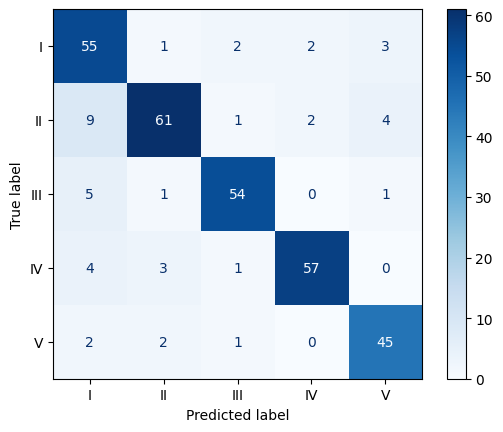

In [ ]:
model_report(NN_model, X_test, y_test)

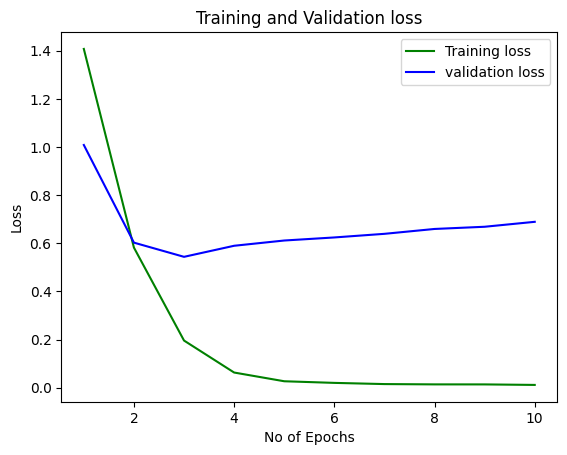

In [ ]:
### Plotting Training Loss and Validation Loss
plot_train_val_loss(NN_model_history)

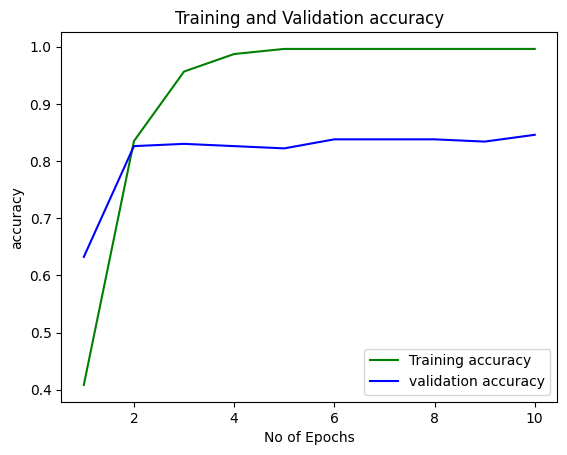

In [ ]:
### Plotting Training Accuracy and Validation Accuracy
plot_train_val_accuracy(NN_model_history)

In [ ]:
NN_model_pickel_path = output_path+model_pickle(NN_model, "BasicNNModel")

BasicNNModel.pkl


In [ ]:
tokenizer_pickle_path = output_path+tokenizer_pickle(tokenizer)

In [ ]:
Accident_Predictor(NN_model_pickel_path, tokenizer_pickle_path)

Summarize on how the accident happened:  During excavation activities in a deep mining shaft, a structural failure in the main support beam caused a catastrophic collapse of the tunnel. The incident occurred without warning, trapping 15 workers under heavy debris. Emergency alarms were activated, and rescue teams were dispatched immediately. However, due to the depth and extent of the collapse, initial rescue efforts were delayed by unstable conditions and poor visibility. Preliminary reports indicate that five workers sustained critical injuries, including spinal fractures and internal bleeding, while two fatalities have been confirmed. Investigations are underway to determine if the structural failure was due to improper reinforcement or undetected geological instability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted Accident Level :  III


### RNN Model

In [ ]:
def build_model_rnn(max_words=1000, max_len=20, num_classes=3):

    RNN_model = Sequential()
    RNN_model.add(Embedding(input_dim=max_words, output_dim=16, input_length=max_len))
    RNN_model.add(SimpleRNN(32, return_sequences=False))
    RNN_model.add(Dense(16))
    RNN_model.add(Activation('relu'))
    RNN_model.add(Dense(num_classes))
    RNN_model.add(Activation('softmax'))

    opt = optimizers.Adam(0.001)

    RNN_model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return RNN_model

In [ ]:
RNN_model = build_model_rnn(max_words, max_len, num_classes=len(label_encoder.classes_))
RNN_model_history = RNN_model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)

Epoch 1/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2871 - loss: 1.5190 - val_accuracy: 0.4704 - val_loss: 1.2025
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5666 - loss: 1.0965 - val_accuracy: 0.6324 - val_loss: 1.0631
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7380 - loss: 0.6930 - val_accuracy: 0.7312 - val_loss: 0.7586
Epoch 4/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.4436 - val_accuracy: 0.6680 - val_loss: 0.8470
Epoch 5/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9156 - loss: 0.2759 - val_accuracy: 0.6838 - val_loss: 1.0256
Epoch 6/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9536 - loss: 0.1715 - val_accuracy: 0.6838 - val_loss: 1.0197
Epoch 7/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0796 - val_accuracy: 0.7115 - val_loss: 1.0050
Epoch 8/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9864 - loss: 0.0610 - val_accuracy: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

Classification Report:
              precision    recall  f1-score   support

           I       0.64      0.48      0.55        63
          II       0.80      0.56      0.66        77
         III       0.65      0.64      0.64        61
          IV       0.60      0.88      0.71        65
           V       0.57      0.68      0.62        50

    accuracy                           0.64       316
   macro avg       0.65      0.65      0.64       316
weighted avg       0.66      0.64      0.64       316

Confusion Matrix:


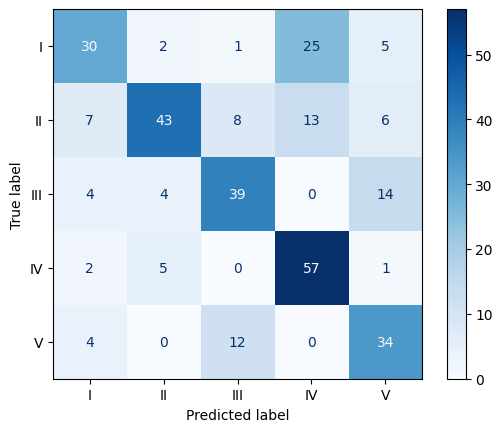

In [ ]:
model_report(RNN_model, X_test, y_test)

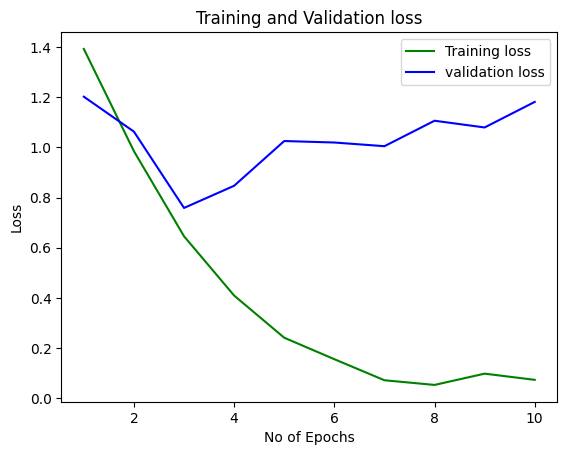

In [ ]:
plot_train_val_loss(RNN_model_history)

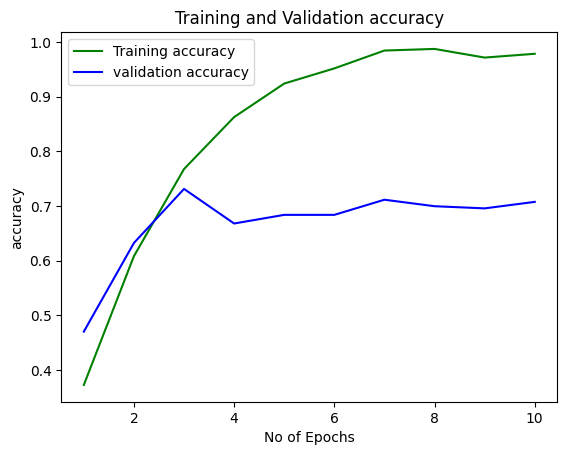

In [ ]:
plot_train_val_accuracy(RNN_model_history)

In [ ]:
RNN_model_pickel_path = output_path+model_pickle(RNN_model, "RNNModel")

RNNModel.pkl


In [ ]:
Accident_Predictor(RNN_model_pickel_path, tokenizer_pickle_path)

Summarize on how the accident happened:  During excavation activities in a deep mining shaft, a structural failure in the main support beam caused a catastrophic collapse of the tunnel. The incident occurred without warning, trapping 15 workers under heavy debris. Emergency alarms were activated, and rescue teams were dispatched immediately. However, due to the depth and extent of the collapse, initial rescue efforts were delayed by unstable conditions and poor visibility. Preliminary reports indicate that five workers sustained critical injuries, including spinal fractures and internal bleeding, while two fatalities have been confirmed. Investigations are underway to determine if the structural failure was due to improper reinforcement or undetected geological instability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
Predicted Accident Level :  I


### LSTM

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Wait 3 epochs without improvement
    mode='min',          # Stop when the monitored metric is minimized
    restore_best_weights=True  # Restore weights from the best epoch
)

def build_model_lstm(max_words=1000, max_len=20, num_classes=3):

    LSTM_model = Sequential()
    LSTM_model.add(Embedding(input_dim=max_words, output_dim=16, input_length=max_len))
    LSTM_model.add(Bidirectional(LSTM(128, return_sequences=True)))
    LSTM_model.add(Dropout(0.5))
    LSTM_model.add(Bidirectional(LSTM(64, return_sequences=False)))
    LSTM_model.add(Dropout(0.5))
    LSTM_model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification

    opt = optimizers.Adam(0.001)

    LSTM_model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return LSTM_model

In [ ]:
LSTM_model = build_model_lstm(max_words, max_len, num_classes=len(label_encoder.classes_))
LSTM_model_history = LSTM_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2615 - loss: 1.5703 - val_accuracy: 0.4506 - val_loss: 1.2682
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6219 - loss: 0.9407 - val_accuracy: 0.6838 - val_loss: 0.7361
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8175 - loss: 0.5425 - val_accuracy: 0.8617 - val_loss: 0.4668
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9030 - loss: 0.3516 - val_accuracy: 0.8221 - val_loss: 0.5473
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8777 - loss: 0.3845 - val_accuracy: 0.8617 - val_loss: 0.4699
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9270 - loss: 0.2481 - val_accuracy: 0.8696 - val_loss: 0.5141
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9614 - loss: 0.1516 - val_accuracy: 0.8538 - val_loss: 0.5398
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9665 - loss: 0.1283 - val_accuracy: 0.8498 - v

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

Classification Report:
              precision    recall  f1-score   support

           I       0.72      0.81      0.76        63
          II       0.88      0.78      0.83        77
         III       0.94      0.82      0.88        61
          IV       0.79      0.82      0.80        65
           V       0.84      0.96      0.90        50

    accuracy                           0.83       316
   macro avg       0.84      0.84      0.83       316
weighted avg       0.84      0.83      0.83       316

Confusion Matrix:


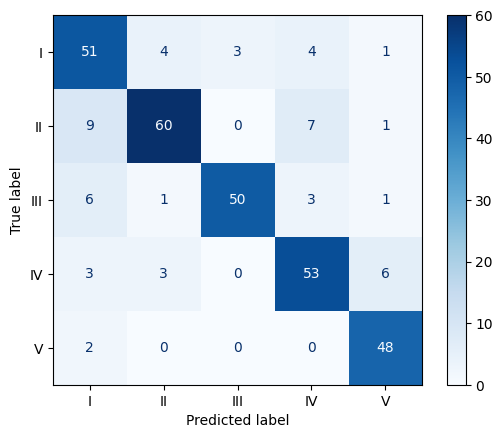

In [ ]:
model_report(LSTM_model, X_test, y_test)

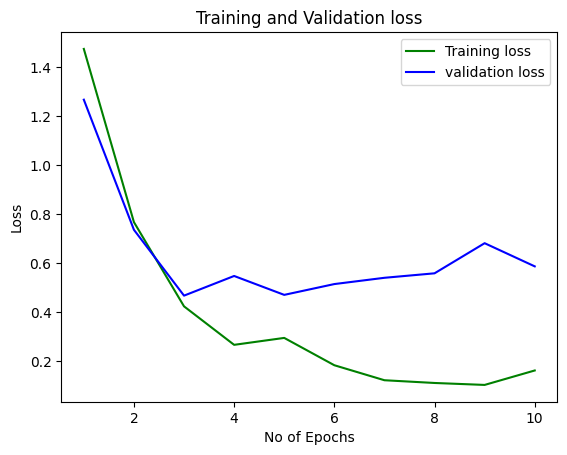

In [ ]:
plot_train_val_loss(LSTM_model_history)

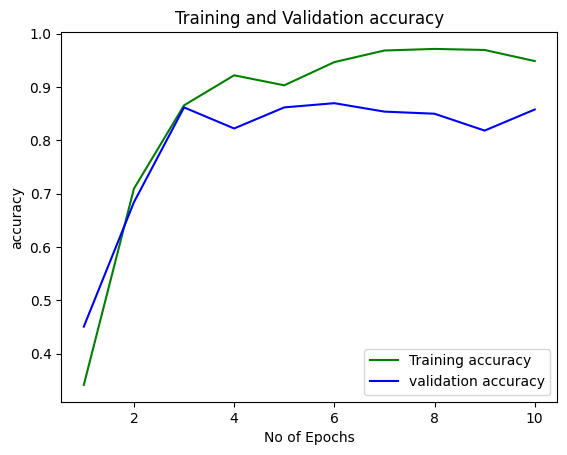

In [ ]:
plot_train_val_accuracy(LSTM_model_history)

In [ ]:
LSTM_model_pickel_path = output_path+model_pickle(LSTM_model, "LSTMModel")

LSTMModel.pkl


In [ ]:
Accident_Predictor(LSTM_model_pickel_path, tokenizer_pickle_path)

Summarize on how the accident happened:  During excavation activities in a deep mining shaft, a structural failure in the main support beam caused a catastrophic collapse of the tunnel. The incident occurred without warning, trapping 15 workers under heavy debris. Emergency alarms were activated, and rescue teams were dispatched immediately. However, due to the depth and extent of the collapse, initial rescue efforts were delayed by unstable conditions and poor visibility. Preliminary reports indicate that five workers sustained critical injuries, including spinal fractures and internal bleeding, while two fatalities have been confirmed. Investigations are underway to determine if the structural failure was due to improper reinforcement or undetected geological instability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted Accident Level :  I


### BERT Classifier

In [ ]:
## %reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
def prepare_data(df, test_size = 0.2, random_state = 42):
    """
    Prepare data for BERT classification

    Args:
        df (pd.DataFrame): Input dataframe with 'Description' and 'Accident Level'
        test_size (float): Proportion of test dataset
        random_state (int): Random seed for reproducibility

    Returns:
        Tuple of train and test datasets with respective labels
    """
    # Encode Target Variable
    label_encoder = LabelEncoder()
    df['Encoded_Level'] = label_encoder.fit_transform(df['Accident Level'])

    # Split data
    x_train, x_test, y_train, y_test = train_test_split(
        df['Description'],
        df['Encoded_Level'],
        test_size = test_size,
        random_state = random_state
    )

    return x_train, x_test, y_train, y_test, label_encoder


In [ ]:
def tokenize_texts(texts, tokenizer, max_length = 128):
    """
    Tokenize input texts for BERT

    Args:
        texts (list): List of text descriptions
        tokenizer (BertTokenizer): BERT tokenizer
        max_length (int): Maximum sequence length

    Returns:
        Tokenized input dictionary
    """
    return tokenizer(
        list(texts),
        padding = True,
        truncation = True,
        max_length = max_length,
        return_tensors = 'tf'
    )

In [ ]:
# Defining a custom layer for BERT outputs
@register_keras_serializable(package = 'Custom', name = "BERTLayer")
class BERTLayer(Layer):
    def __init__(self, bert_model = 'bert-base-uncased', **kwargs):
        super(BERTLayer, self).__init__(**kwargs)
        self.bert_model_name = bert_model
        self.bert_model = TFBertModel.from_pretrained(self.bert_model_name)

    def call(self, inputs, **kwargs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids = input_ids, attention_mask = attention_mask)
        return outputs.last_hidden_state

    def get_config(self):
        config = super(BERTLayer, self).get_config()
        config.update({
            "bert_model" : self.bert_model_name
        })
        return config


def create_bert_classifier(num_classes, bert_model = 'bert-base-uncased', max_length = 128):
    """
    Create BERT classification model

    Args:
        num_classes (int): Number of accident levels
        bert_model (str): Pre-trained BERT model name
        max_length (int): Maximum sequence length

    Returns:
        Compiled Keras model
    """

    # Inputs
    input_ids = Input(shape = (max_length,), dtype = tf.int32,
                     name = 'input_ids')
    attention_mask = Input(shape = (max_length,), dtype = tf.int32,
                    name = 'attention_mask')


    bert_output = BERTLayer(bert_model = bert_model)([input_ids, attention_mask])


    # Classification layers
    x = tf.keras.layers.GlobalAveragePooling1D()(bert_output)
    x = Dropout(0.3)(x)
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(num_classes, activation = 'softmax')(x)

    model = Model(
        inputs = [input_ids, attention_mask],
        outputs = output
    )

    # Compile Model
    model.compile(optimizer = Adam(learning_rate = 2e-5),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return model


In [ ]:
def save_model_and_label_encoder(model, label_encoder, model_path = 'bert_classifier.h5', label_encoder_path = 'label_encoder.npy'):
    """
    Save the trained model and label encoder.

    Args:
        model (tf.keras.Model): Trained model
        label_encoder (LabelEncoder): Fitted label encoder
        model_path (str): File path to save the model
        label_encoder_path (str): File path to save the label encoder
    """
    model.save(model_path)
    np.save(label_encoder_path, label_encoder.classes_)
    print(f"Model saved to {model_path}")
    print(f"Label Encoder saved to {label_encoder_path}")

In [ ]:
def evaluate_model(model, tokenizer, x_test, y_test, label_encoder, max_length = 128):
    """
    Evaluate the trained model and display classification report and confusion matrix.

    Args:
        model (tf.keras.Model): Trained BERT model
        tokenizer (BertTokenizer): BERT tokenizer
        x_test (list): Test text data
        y_test (list): True labels
        label_encoder (LabelEncoder): Label encoder
        max_length (int): Maximum sequence length
    """
    # Tokenize test data
    test_encodings = tokenize_texts(x_test, tokenizer, max_length)

    # Predict
    y_pred_probs = model.predict({
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    })
    y_pred = np.argmax(y_pred_probs, axis = 1)

    # Decode labels
    y_true_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    # Classification report
    print("Classification Report:\n")
    print(classification_report(y_true_labels, y_pred_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    print("Confusion Matrix:\n", cm)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
    disp.plot(cmap = "Blues")
    plt.title("Confusion Matrix")
    plt.show()



In [ ]:
def train_bert_classifier(df, max_epochs = 10, batch_size = 16):
    """
    Train and evaluate BERT classifier

    Args:
        df (pd.DataFrame): Input dataframe
        max_epochs (int): Maximum training epochs
        batch_size (int): Training batch size
    """

    # Prepare data
    x_train, x_test, y_train, y_test, label_encoder = prepare_data(df)

    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize data
    train_encodings = tokenize_texts(x_train, tokenizer)
    test_encodings = tokenize_texts(x_test, tokenizer)

    # Create model
    model = create_bert_classifier(num_classes = len(label_encoder.classes_))

    # Early Stopping
    early_stop = EarlyStopping(
        monitor = 'val_loss',
        patience = 3,
        restore_best_weights = True
    )

    history = model.fit({
            'input_ids': train_encodings['input_ids'],
            'attention_mask': train_encodings['attention_mask']
        },
        y_train,
        validation_split=0.2,
        epochs=max_epochs,
        batch_size=batch_size,
        callbacks=[early_stop])

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(
        {
             'input_ids': test_encodings['input_ids'],
            'attention_mask': test_encodings['attention_mask']
        },
        y_test
    )

    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    save_model_and_label_encoder(model, label_encoder)

    return model, label_encoder, history, tokenizer, x_test, y_test


In [ ]:
model, label_encoder, history, tokenizer, x_test, y_test = train_bert_classifier(synthetic_df, max_epochs = 25)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/25


W0000 00:00:1734689441.742802      96 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
I0000 00:00:1734689454.705671     838 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1734689455.026267     836 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 760 bytes spill stores, 756 bytes spill loads

I0000 00:00:1734689456.008272     835 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1304', 764 bytes spill stores, 760 bytes spill loads



63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.1772 - loss: 1.7140

W0000 00:00:1734689466.403399      97 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
I0000 00:00:1734689472.093644     864 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1734689476.770945     865 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 760 bytes spill stores, 756 bytes spill loads

I0000 00:00:1734689478.903201     862 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1304', 764 bytes spill stores, 760 bytes spill loads



64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.1778 - loss: 1.7133

W0000 00:00:1734689484.657462      99 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
I0000 00:00:1734689488.833585     891 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1734689492.150735     893 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 968 bytes spill stores, 924 bytes spill loads

W0000 00:00:1734689494.980365      98 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
I0000 00:00:1734689496.669812     907 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1734689501.109213     908 asm_compiler.cc:369] ptxas warning : Registers are spilled to

64/64 ━━━━━━━━━━━━━━━━━━━━ 73s 687ms/step - accuracy: 0.1783 - loss: 1.7127 - val_accuracy: 0.2767 - val_loss: 1.5558
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.2567 - loss: 1.6161 - val_accuracy: 0.3518 - val_loss: 1.4828
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.3273 - loss: 1.5269 - val_accuracy: 0.5138 - val_loss: 1.4231
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.3626 - loss: 1.4873 - val_accuracy: 0.6245 - val_loss: 1.3682
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.3939 - loss: 1.4395 - val_accuracy: 0.6798 - val_loss: 1.3167
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.4669 - loss: 1.3680 - val_accuracy: 0.7431 - val_loss: 1.2685
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.5196 - loss: 1.3055 - val_accuracy: 0.7787 - val_loss: 1.2219
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.5694 - loss: 1.2515 - val_accuracy: 0.8063 - val

W0000 00:00:1734689718.465555      97 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9207 - loss: 0.6954

W0000 00:00:1734689722.725549      99 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 461ms/step - accuracy: 0.9213 - loss: 0.6929
Test Accuracy: 92.41%
Model saved to bert_classifier.h5
Label Encoder saved to label_encoder.npy


W0000 00:00:1734689734.704012      99 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

W0000 00:00:1734689740.826546      97 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 716ms/step
Classification Report:

              precision    recall  f1-score   support

           I       0.73      0.98      0.84        63
          II       1.00      0.84      0.92        77
         III       0.98      0.92      0.95        61
          IV       1.00      0.92      0.96        65
           V       1.00      0.98      0.99        50

    accuracy                           0.92       316
   macro avg       0.94      0.93      0.93       316
weighted avg       0.94      0.92      0.93       316

Confusion Matrix:
 [[62  0  1  0  0]
 [12 65  0  0  0]
 [ 5  0 56  0  0]
 [ 5  0  0 60  0]
 [ 1  0  0  0 49]]


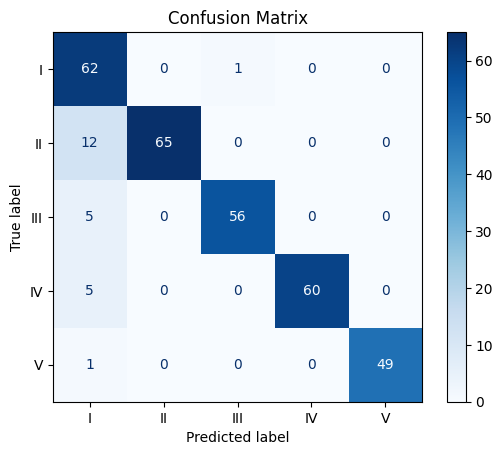

In [ ]:
evaluate_model(model, tokenizer, x_test, y_test, label_encoder)

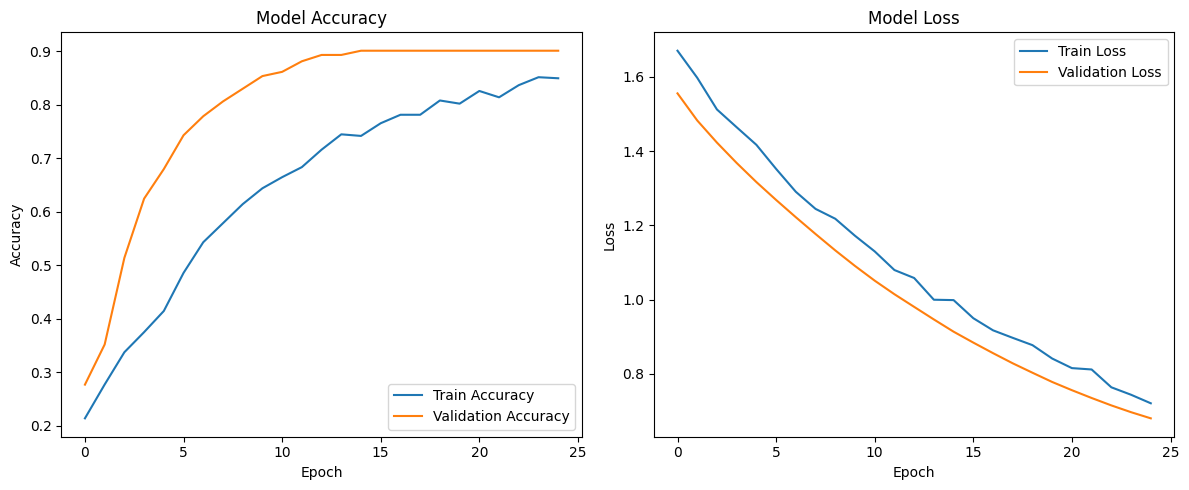

In [ ]:
# Function to plot accuracy and loss curves
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot training history
plot_training_history(history)

In [ ]:
def predict_accident_level(model_path, label_encoder_path, max_length = 128):
    import tensorflow as tf
    from transformers import BertTokenizer
    from tensorflow.keras.models import load_model
    import pickle
    import numpy as np
    from sklearn.preprocessing import LabelEncoder

    """
    Predict Accident Level for user-provided input.

    Args:
        model_path (str): Path to the saved model.
        label_encoder_path (str): Path to the saved label encoder (pickle file).
        max_length (int): Maximum token length for BERT input.

    Returns:
        None. Prints the prediction result.
    """
    # Load the saved model
    print("Loading the saved model....")
    model = load_model(model_path, custom_objects = {"TFBertModel": tf.keras.layers.Layer})

    # Load the label encoder
    print("Loading the label encoder.....")
    label_classes = np.load(label_encoder_path, allow_pickle = True)

    # Reconstruct the label encoder
    print("Reconstructing the label encoder.....")
    label_encoder = LabelEncoder()
    label_encoder.classes_ = label_classes

    # Loading BERT Tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Take input from user
    user_input = input("Summarize on how the accident happened: ")
    if not user_input.strip():
        print("Invalid input. Please provide a non-empty description.")
        return

    # Tokenize the user input
    print("Tokenizing the input.....")
    inputs = tokenizer(
        [user_input],
        max_length = max_length,
        padding = 'max_length',
        truncation = True,
        return_tensors = 'tf'
    )

    # Make predictions
    print("Making predictions.....")
    predictions = model.predict({
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask']
    })

    # Get the predicted class
    predicted_class_index = np.argmax(predictions, axis = 1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

    # Display the result
    print(f"\n Predicted Accident Level: {predicted_label}")

In [ ]:
model_path = '/kaggle/working/bert_classifier.h5'
label_encoder_path = '/kaggle/working/label_encoder.npy'

predict_accident_level(model_path, label_encoder_path)

Loading the saved model....


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Loading the label encoder.....
Reconstructing the label encoder.....


Summarize on how the accident happened:  During excavation activities in a deep mining shaft, a structural failure in the main support beam caused a catastrophic collapse of the tunnel. The incident occurred without warning, trapping 15 workers under heavy debris. Emergency alarms were activated, and rescue teams were dispatched immediately. However, due to the depth and extent of the collapse, initial rescue efforts were delayed by unstable conditions and poor visibility. Preliminary reports indicate that five workers sustained critical injuries, including spinal fractures and internal bleeding, while two fatalities have been confirmed. Investigations are underway to determine if the structural failure was due to improper reinforcement or undetected geological instability


Tokenizing the input.....
Making predictions.....


W0000 00:00:1734689773.099408      97 assert_op.cc:38] Ignoring Assert operator functional_24_1/bert_layer_1/tf_bert_model_1/bert/embeddings/assert_less/Assert/Assert
I0000 00:00:1734689774.691969    1357 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_27', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1734689779.429372    1357 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_27', 968 bytes spill stores, 924 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step

 Predicted Accident Level: IV


### Summary


With synthetic data for minority classes and deep learning models, we are now able to predict all classes.

**Generalization Capabiliy**

*   BERT is the best model for generalization, achieving the highest
*   validation accuracy (90.91%) and the lowest validation loss (67.60%).
LSTM is a close second, with decent validation accuracy (85.77%) and validation loss (73.45%).
*   ANN generalizes well but not as effectively as LSTM or BERT.
*   RNN struggles with generalization, as shown by its poor validation metrics.

**Overfitting**
*   ANN and RNN show clear signs of overfitting due to the large gaps between training and validation metrics.
*   LSTM shows less overfitting, maintaining closer training and validation results.
*   BERT avoids overfitting entirely, as evident from its relatively lower training accuracy and strong validation performance.

**Training Efficiency**
*   ANN, RNN, and LSTM train faster due to their simpler architectures.
*   BERT, being a transformer-based model, requires more computational resources and training time but provides superior results.

**Overall Performance**

*   BERT emerges as the best model due to its ability to generalize well, as demonstrated by the highest validation accuracy and lowest validation loss.
*   LSTM comes in second, offering a good balance of performance metrics.
*   ANN performs adequately but shows minor overfitting.
*   RNN ranks the lowest due to its poor validation performance and high loss values.









## Conclusion

This project successfully developed and evaluated several machine learning and deep learning models for classifying industrial accident severity based on textual descriptions. Addressing the inherent data imbalance was a primary focus, explored through merging minor accident levels and, most notably, leveraging a Large Language Model (LLM) – specifically Mistral Instruct V0.3 – to synthesize realistic synthetic data for minority classes. This innovative approach proved crucial in training more robust and equitable models.

Four distinct model architectures were implemented and compared: Artificial Neural Networks (ANNs), Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), and a fine-tuned Bidirectional Encoder Representations from Transformers (BERT) model.
Each model demonstrated varying capabilities in capturing the contextual and sequential nature of the textual data.

**Key findings**

* BERT emerged as the superior model, achieving the highest validation
accuracy (90.91%) and lowest validation loss (67.60%), demonstrating strong generalization and minimal overfitting.
* This highlights the effectiveness of transfer learning and contextual embeddings for this task.
* LSTM performed well as a secondary model, striking a good balance between performance metrics and computational cost.
* ANN and RNN, while simpler to train, showed limitations in handling the complexities of textual data and exhibited signs of overfitting.

* The project also addressed practical considerations by serializing models for easy reuse and developing a real-time prediction utility, enabling immediate application of the trained models.

**Future improvements**
* Explore specialized industrial pre-trained transformer models, implementing real-time deployment strategies using web frameworks, experimenting with ensemble methods combining the strengths of different models (e.g., BERT and LSTM), exploring integration with existing safety monitoring systems, utilizing larger and more diverse datasets, and potentially incorporating multilingual capabilities.

Overall, this project demonstrated the potential of NLP and advanced deep learning models, particularly BERT, for significantly improving industrial safety by enabling automated and accurate assessment of accident severity based on textual descriptions. This work lays a strong foundation for developing more sophisticated and practical safety tools in the future.
